# PHYS 434 Lab 7

## Thomas K. Waters

In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import h5py
import pandas as pd
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
import pandas as pd

plt.rcParams["figure.figsize"] = (15,10)

# Lab 7

### Reading in the data:

In [2]:
signal = open("/Users/tw94/UW/PHYS_434/data/higgs_100000_pt_1000_1200.pkl",'rb')
signaldf = pickle.load(signal)

In [3]:
background = open("/Users/tw94/UW/PHYS_434/data/qcd_100000_pt_1000_1200.pkl",'rb')
backgrounddf = pickle.load(background)

In [4]:
signaldf

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [5]:
backgrounddf

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


### 1. Make a stacked histogram plot for the feature variable: mass
    * Evaluate expected significance without any event selection.
        * Use Poisson statistics for significance calculation
        * Compare the exact significance to the approximation 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷). If they are equivalent, explain your findings.

''

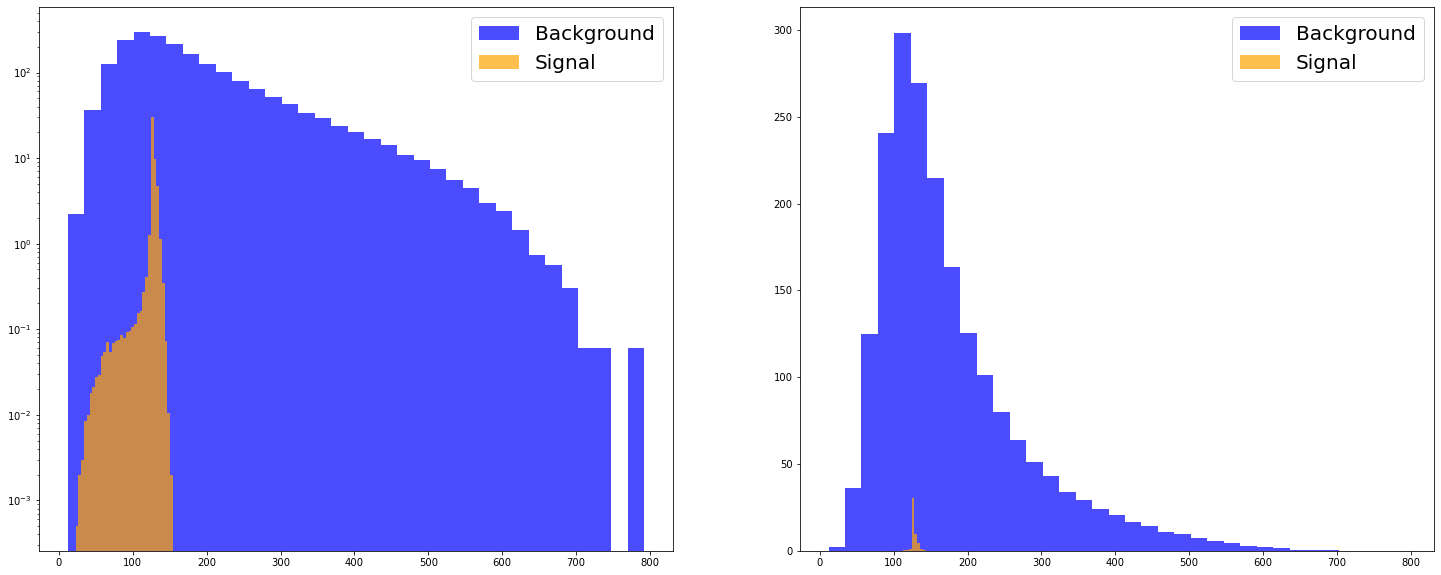

In [6]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))

n_qcd_orig, temp1, temp2 = ax[0].hist(backgrounddf['mass'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
n_higgs_orig, temp1, temp2 = ax[0].hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0].set_yscale('log')
ax[0].legend(prop = {'size': 20})

n, temp1, temp2 = ax[1].hist(backgrounddf['mass'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1].hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1].legend(prop = {'size': 20})
;

In [7]:
mu_back = 2000
mu_sig = 50

In [8]:
prob = stats.poisson.cdf(mu_back+mu_sig, mu = mu_back, loc = 0)
expect_signif = stats.norm.ppf(prob, loc = 0, scale = 1)
expect_signif

1.1282230087754428

In [9]:
N_higgs = 50
N_qcd = 2000

expect_signif_approx = N_higgs/np.sqrt(N_qcd)
expect_signif_approx

1.118033988749895

In [10]:
print(f'The percent error for the exact significance to the approximation is {((expect_signif - expect_signif_approx)/expect_signif_approx)*100:.2f}%')

The percent error for the exact significance to the approximation is 0.91%


The expected exact significance compared to the approximation is actually quite close. I do not think it would cause much difference if I were to use either!

### 2. Identify mass cuts to optimize the expected significance.
    * Try different mass cuts systematically
    * Evaluate expected significance for each set of mass cuts
    * Identify the set of mass cuts which give you the highest significance.

In [11]:
mass_mask1 = backgrounddf['mass'] < 400
mass_mask2 = backgrounddf['mass'] < 300
mass_mask3 = backgrounddf['mass'] < 200
mass_mask4 = backgrounddf['mass'] < 175
mass_mask5 = backgrounddf['mass'] < 160

In [12]:
cut_mass1 = backgrounddf['mass'][mass_mask1]
cut_mass2 = backgrounddf['mass'][mass_mask2]
cut_mass3 = backgrounddf['mass'][mass_mask3]
cut_mass4 = backgrounddf['mass'][mass_mask4]
cut_mass5 = backgrounddf['mass'][mass_mask5]

''

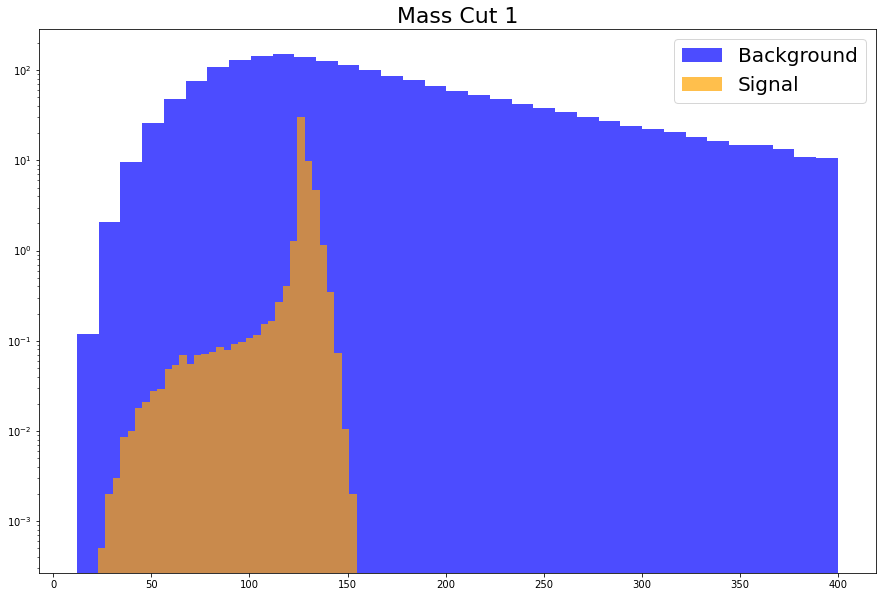

In [13]:
n1, temp1, temp2 = plt.hist(cut_mass1, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass1)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 1', size = 22)
;

''

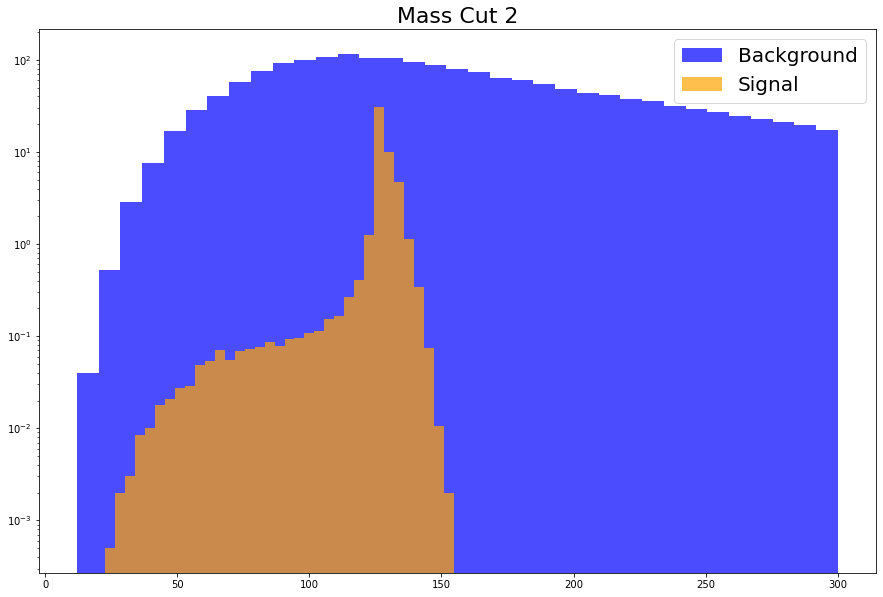

In [14]:
n2, temp1, temp2 = plt.hist(cut_mass2, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass2)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 2', size = 22)
;

''

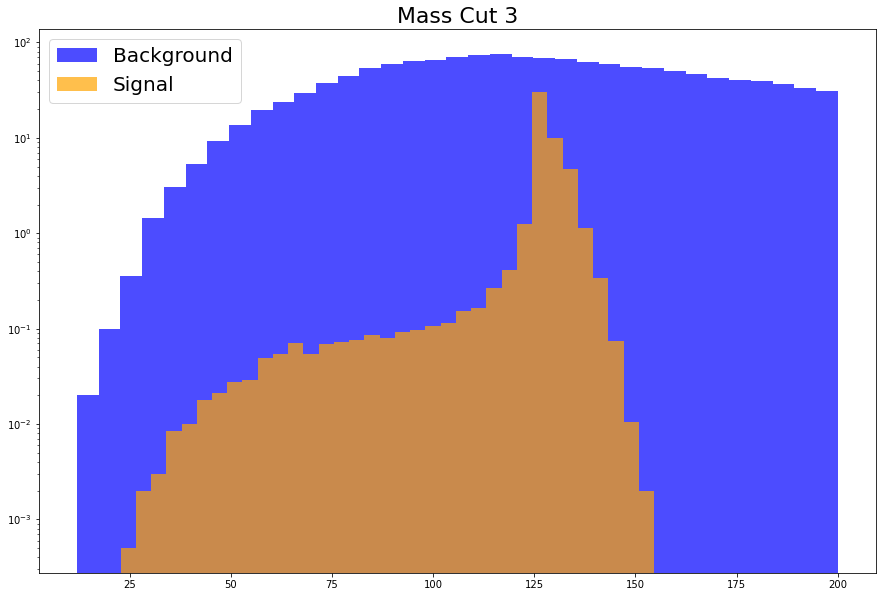

In [15]:
n3, temp1, temp2 = plt.hist(cut_mass3, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass3)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 3', size = 22)
;

''

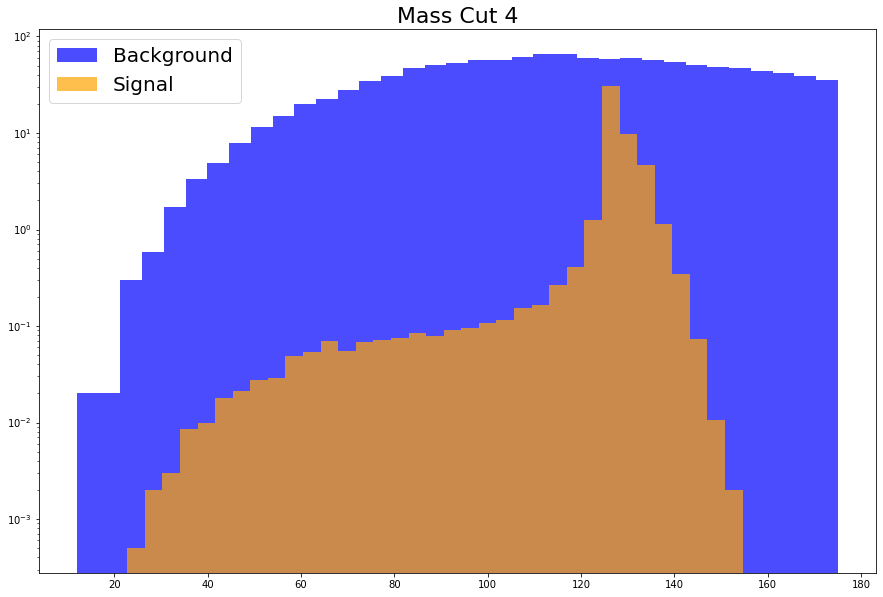

In [16]:
n4, temp1, temp2 = plt.hist(cut_mass4, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass4)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 4', size = 22)
;

''

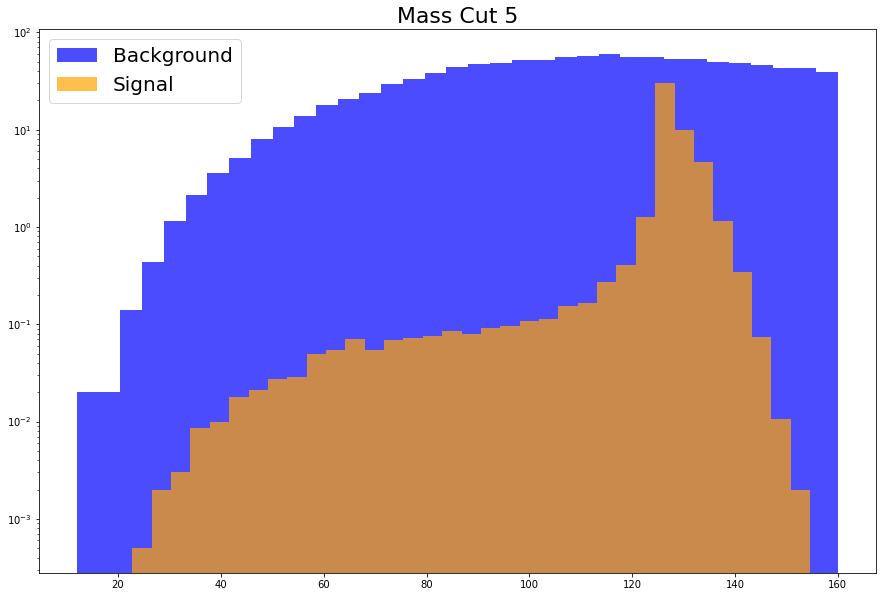

In [17]:
n5, temp1, temp2 = plt.hist(cut_mass5, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass5)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 5', size = 22)
;

''

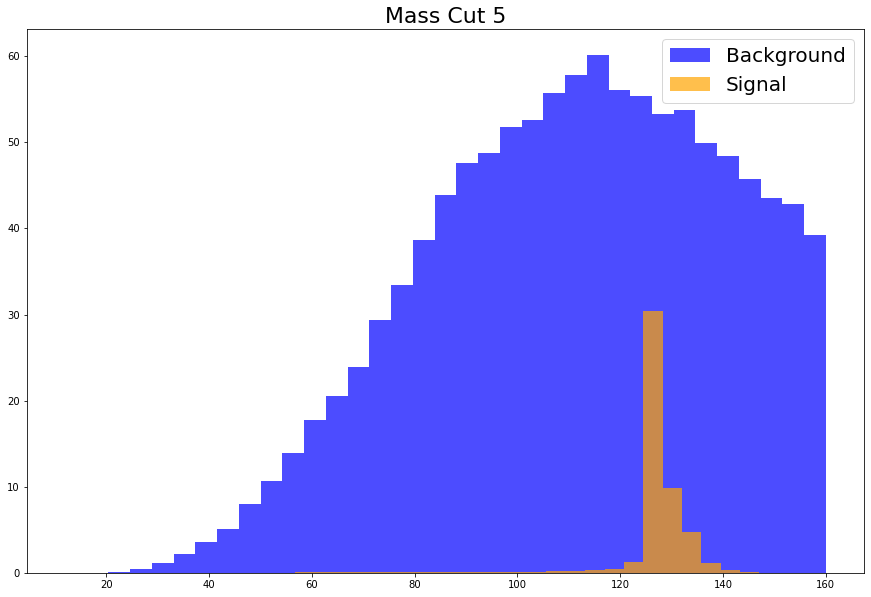

In [18]:
n5, temp1, temp2 = plt.hist(cut_mass5, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass5)))
plt.hist(signaldf['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
#plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 5', size = 22)
;

It looks like we can also make a mass cut from the minimum as well (mass > 100)

In [19]:
mass_mask6 = cut_mass5 > 100
mas_mask6_sig = signaldf['mass'] > 100

In [20]:
cut_mass6 = cut_mass5[mass_mask6]
cut_mass_sig = signaldf['mass'][mas_mask6_sig]

''

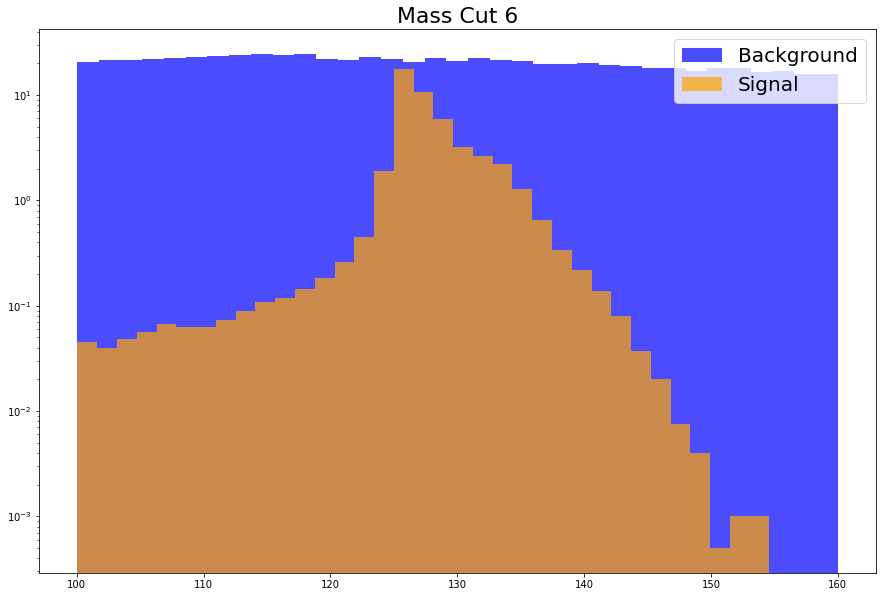

In [21]:
n6, temp1, temp2 = plt.hist(cut_mass6, bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_mass6)))
n6_sig, temp1, temp2 = plt.hist(cut_mass_sig, bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(cut_mass_sig)))
plt.yscale('log')
plt.legend(prop = {'size': 20})
plt.title('Mass Cut 6', size = 22)
;

In [22]:
N_qcd1 = np.sum(n1)
N_qcd2 = np.sum(n2)
N_qcd3 = np.sum(n3)
N_qcd4 = np.sum(n4)
N_qcd5 = np.sum(n5)
N_qcd6 = np.sum(n6)
N_higgs6 = np.sum(n6_sig)

In [23]:
N_qcd1, N_qcd2, N_qcd3, N_qcd4, N_qcd5, N_qcd6

(1910.9600000000064,
 1767.96000000002,
 1408.6200000000495,
 1241.30000000005,
 1115.2800000000389,
 724.1799999999877)

In [24]:
prob1 = stats.poisson.cdf(N_qcd1+N_higgs, mu = N_qcd1, loc = 0)
expect_signif1 = stats.norm.ppf(prob1, loc = 0, scale = 1)

prob2 = stats.poisson.cdf(N_qcd2+N_higgs, mu = N_qcd2, loc = 0)
expect_signif2 = stats.norm.ppf(prob2, loc = 0, scale = 1)

prob3 = stats.poisson.cdf(N_qcd3+N_higgs, mu = N_qcd3, loc = 0)
expect_signif3 = stats.norm.ppf(prob3, loc = 0, scale = 1)

prob4 = stats.poisson.cdf(N_qcd4+N_higgs, mu = N_qcd4, loc = 0)
expect_signif4 = stats.norm.ppf(prob4, loc = 0, scale = 1)

prob5 = stats.poisson.cdf(N_qcd5+N_higgs, mu = N_qcd5, loc = 0)
expect_signif5 = stats.norm.ppf(prob5, loc = 0, scale = 1)

prob6 = stats.poisson.cdf(N_qcd6+N_higgs6, mu = N_qcd6, loc = 0)
expect_signif6 = stats.norm.ppf(prob6, loc = 0, scale = 1)

In [25]:
[expect_signif1, expect_signif2, expect_signif3, expect_signif4, expect_signif5, expect_signif6]

[1.1322139069193664,
 1.1767087203807414,
 1.3256991332788286,
 1.4200916870569553,
 1.4976569334063763,
 1.8186275986476392]

In [26]:
expect_signif_approx1 = N_higgs/np.sqrt(N_qcd1)

expect_signif_approx2 = N_higgs/np.sqrt(N_qcd2)

expect_signif_approx3 = N_higgs/np.sqrt(N_qcd3)

expect_signif_approx4 = N_higgs/np.sqrt(N_qcd4)

expect_signif_approx5 = N_higgs/np.sqrt(N_qcd5)

expect_signif_approx6 = N_higgs6/np.sqrt(N_qcd6)

In [27]:
expect_signif_approx1, expect_signif_approx2, expect_signif_approx3, expect_signif_approx4, expect_signif_approx5, expect_signif_approx6

(1.1437844977755613,
 1.1891421872970123,
 1.3322111959603575,
 1.4191608655233774,
 1.4971938939181733,
 1.8219033868362693)

As we can see from the above mass cuts, we reduce the number of QCDs in the mass range that is above that of the higgs particles. So, by reducing the background to masses less than as close to the largest mass of the higgs particle as possible, we improve our significance slightly. However, if we continue cutting mass further, we will start cutting out higgs particles and will reduce the significance. So I believe that the optimal mass cut is less than a mass of 160 and greater than a mass of 100.

In [28]:
final_mass_mask_bkg = (backgrounddf['mass'] < 160) & (backgrounddf['mass'] > 100)
final_mass_mask_sig = (signaldf['mass'] < 160) & (signaldf['mass'] > 100)

In [29]:
backgrounddf_mc = backgrounddf[final_mass_mask_bkg]
signaldf_mc = signaldf[final_mass_mask_sig]

In [30]:
x = [400, 300, 200, 175, 160]

In [31]:
x6 = 160
y6 = expect_signif6
y6_e = expect_signif_approx6

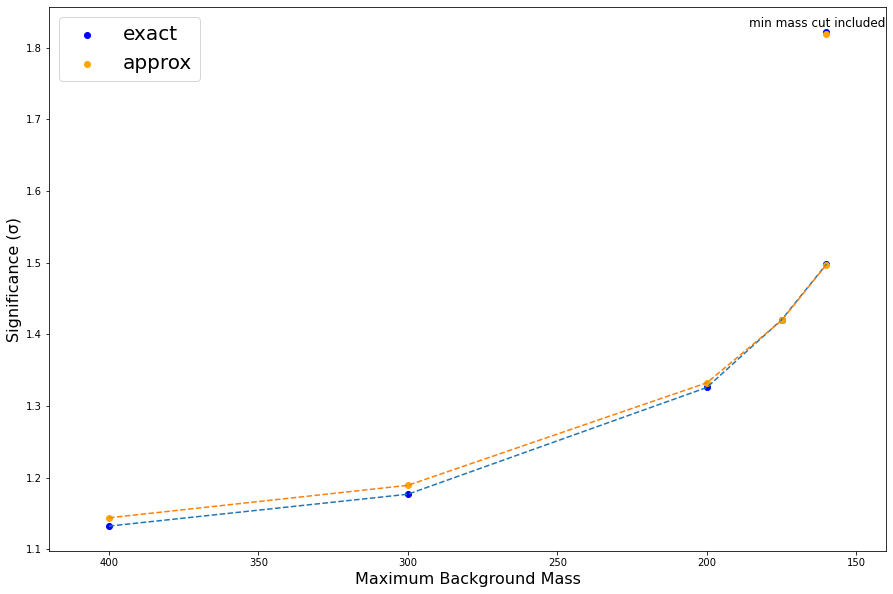

In [32]:
plt.scatter(x, ([expect_signif1, expect_signif2, expect_signif3, expect_signif4, expect_signif5]), label = 'exact', color = 'blue')
plt.scatter(x, ([expect_signif_approx1, expect_signif_approx2, expect_signif_approx3, expect_signif_approx4, expect_signif_approx5]), label = 'approx', color = 'orange')
plt.plot(x, ([expect_signif1, expect_signif2, expect_signif3, expect_signif4, expect_signif5]), linestyle = '--')
plt.plot(x, ([expect_signif_approx1, expect_signif_approx2, expect_signif_approx3, expect_signif_approx4, expect_signif_approx5]), linestyle = '--')
plt.scatter(x6, y6_e, color = 'blue')
plt.scatter(x6, y6, color = 'orange')

plt.annotate(f'min mass cut included', (185.9, y6+0.01), size = 12)


plt.ylabel('Significance (σ)', size = 16)
plt.xlabel('Maximum Background Mass', size = 16)
plt.xlim(np.max(x)+20, np.min(x)-20)
plt.legend(prop = {'size':20})

The above plot show the expected and exact significance as a function of the maximum background mass cut. The final point in the top right show the maximum mass cut of < 160 and the minimum mass cut of > 100.

### 3. Make two sets of stacked histogram plots for the rest of the features
    * Set A without any event selection
        * Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)
    * Set B with your optimal mass cuts
        * Can you identify another feature to further improve your expected signifiance?

#### Set A:

''

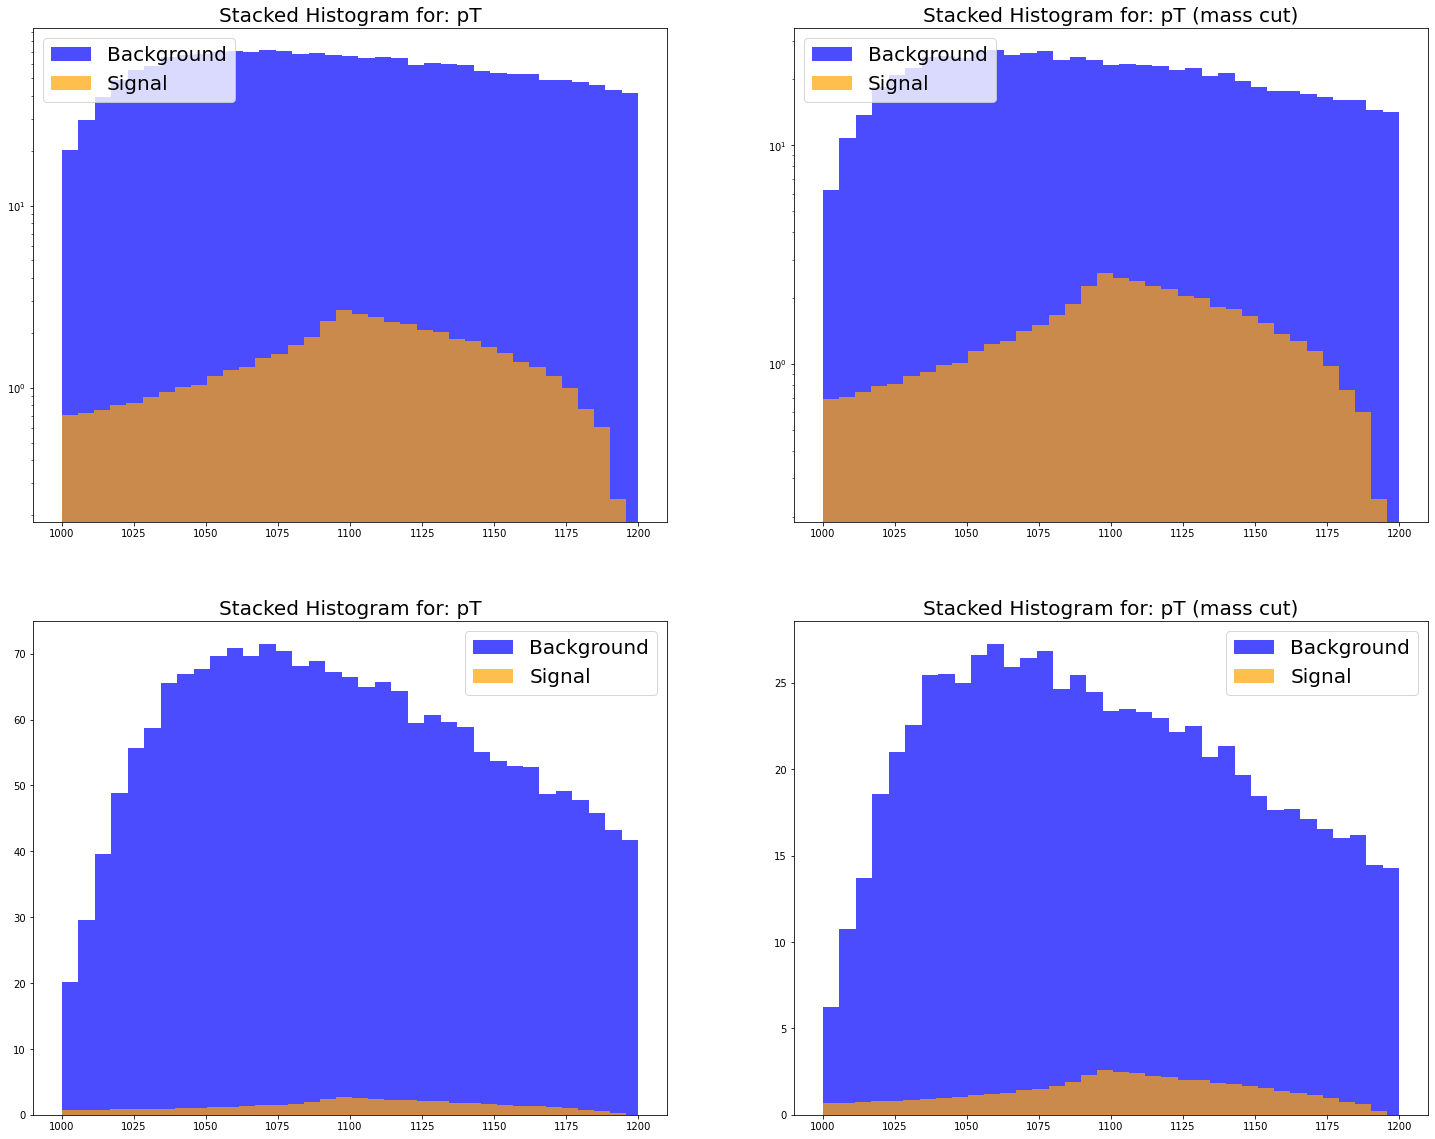

In [33]:
fig, ax = plt.subplots(2,2, figsize = (25,20))

ax[0,0].hist(backgrounddf['pt'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['pt'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: pT', size = 20)

ax[0,1].hist(backgrounddf_mc['pt'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['pt'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: pT (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['pt'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['pt'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: pT', size = 20)

ax[1,1].hist(backgrounddf_mc['pt'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['pt'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: pT (mass cut)', size = 20)
;

No obvious cuts here to improve significance, not much efect with mass cut.

''

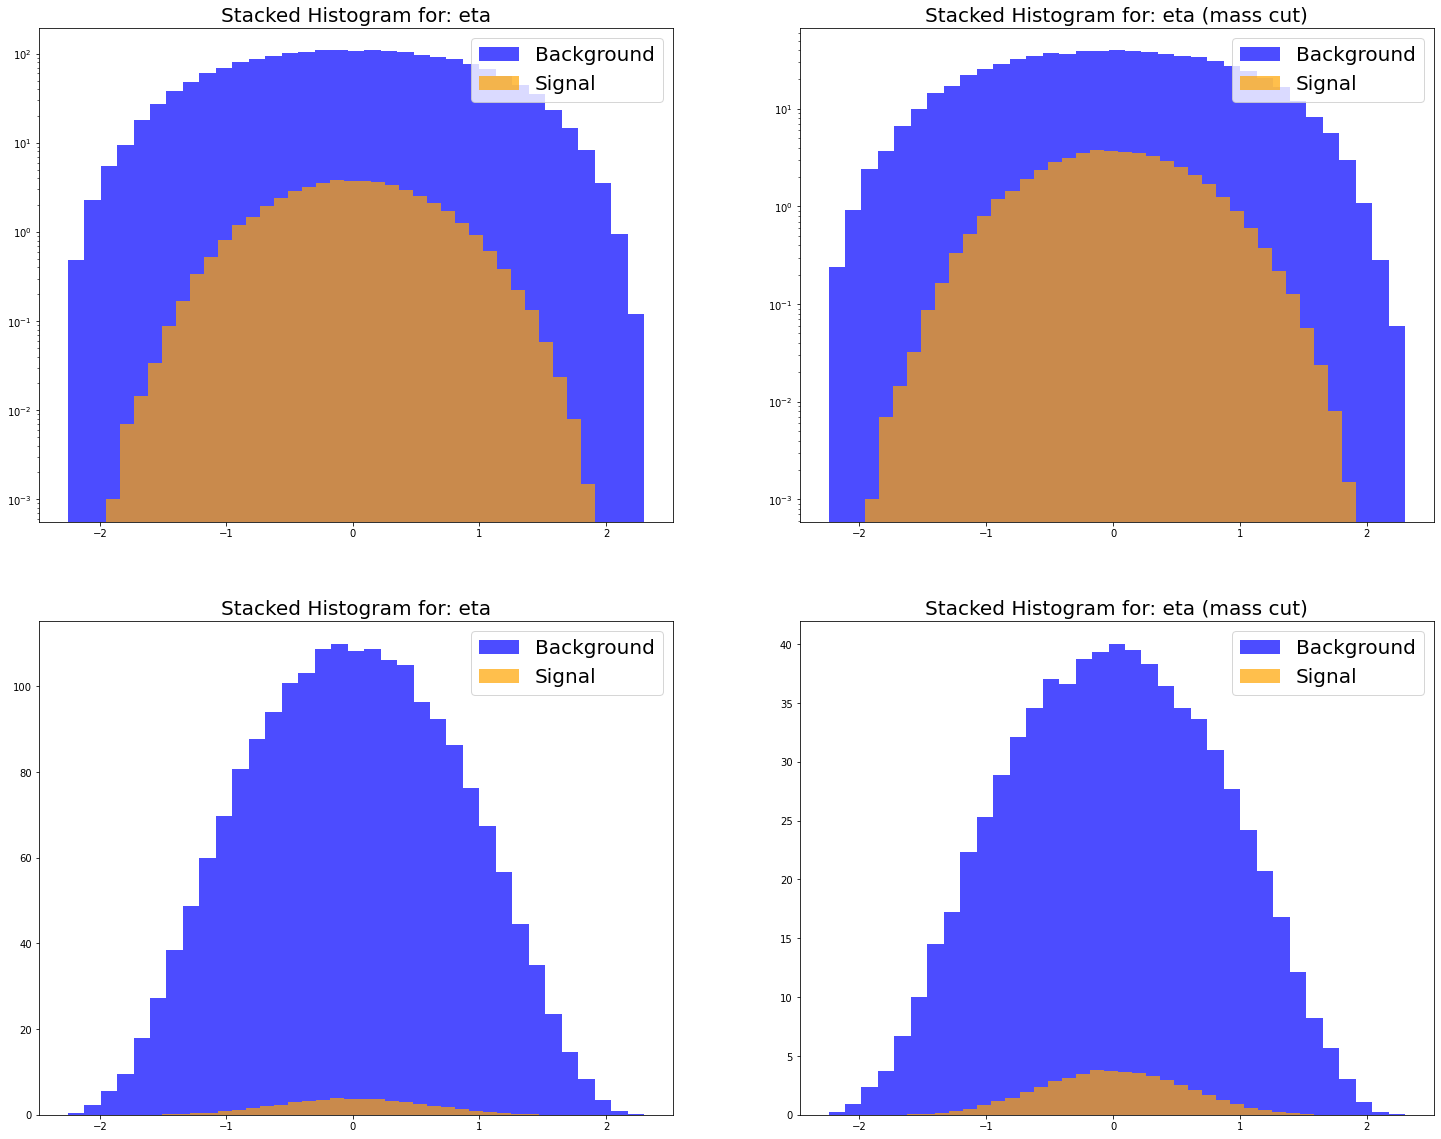

In [34]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['eta'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['eta'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: eta', size = 20)


ax[0,1].hist(backgrounddf_mc['eta'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['eta'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: eta (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['eta'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['eta'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: eta', size = 20)


ax[1,1].hist(backgrounddf_mc['eta'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['eta'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: eta (mass cut)', size = 20)
;

Could potentially cut eta to <|1.5|. Not much effect from mass cut.

''

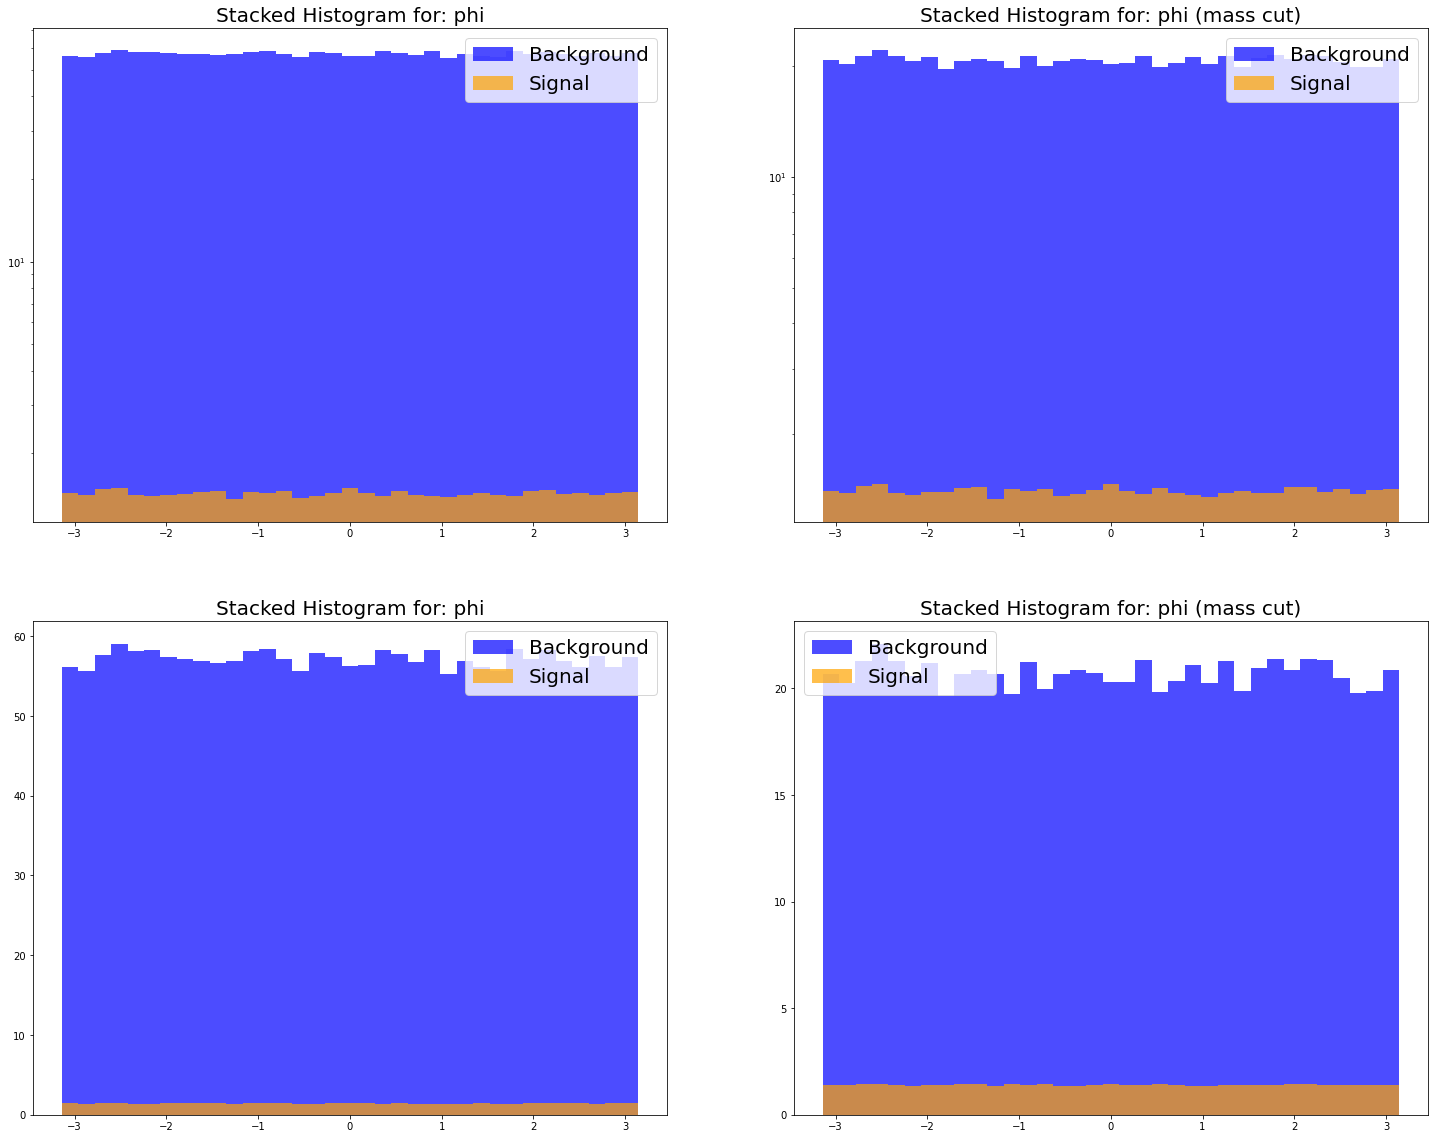

In [35]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))


ax[0,0].hist(backgrounddf['phi'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['phi'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: phi', size = 20)

ax[0,1].hist(backgrounddf_mc['phi'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['phi'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: phi (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['phi'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['phi'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: phi', size = 20)

ax[1,1].hist(backgrounddf_mc['phi'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['phi'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: phi (mass cut)', size = 20)
;

No useful cuts here. Not much effect from mass cut.

''

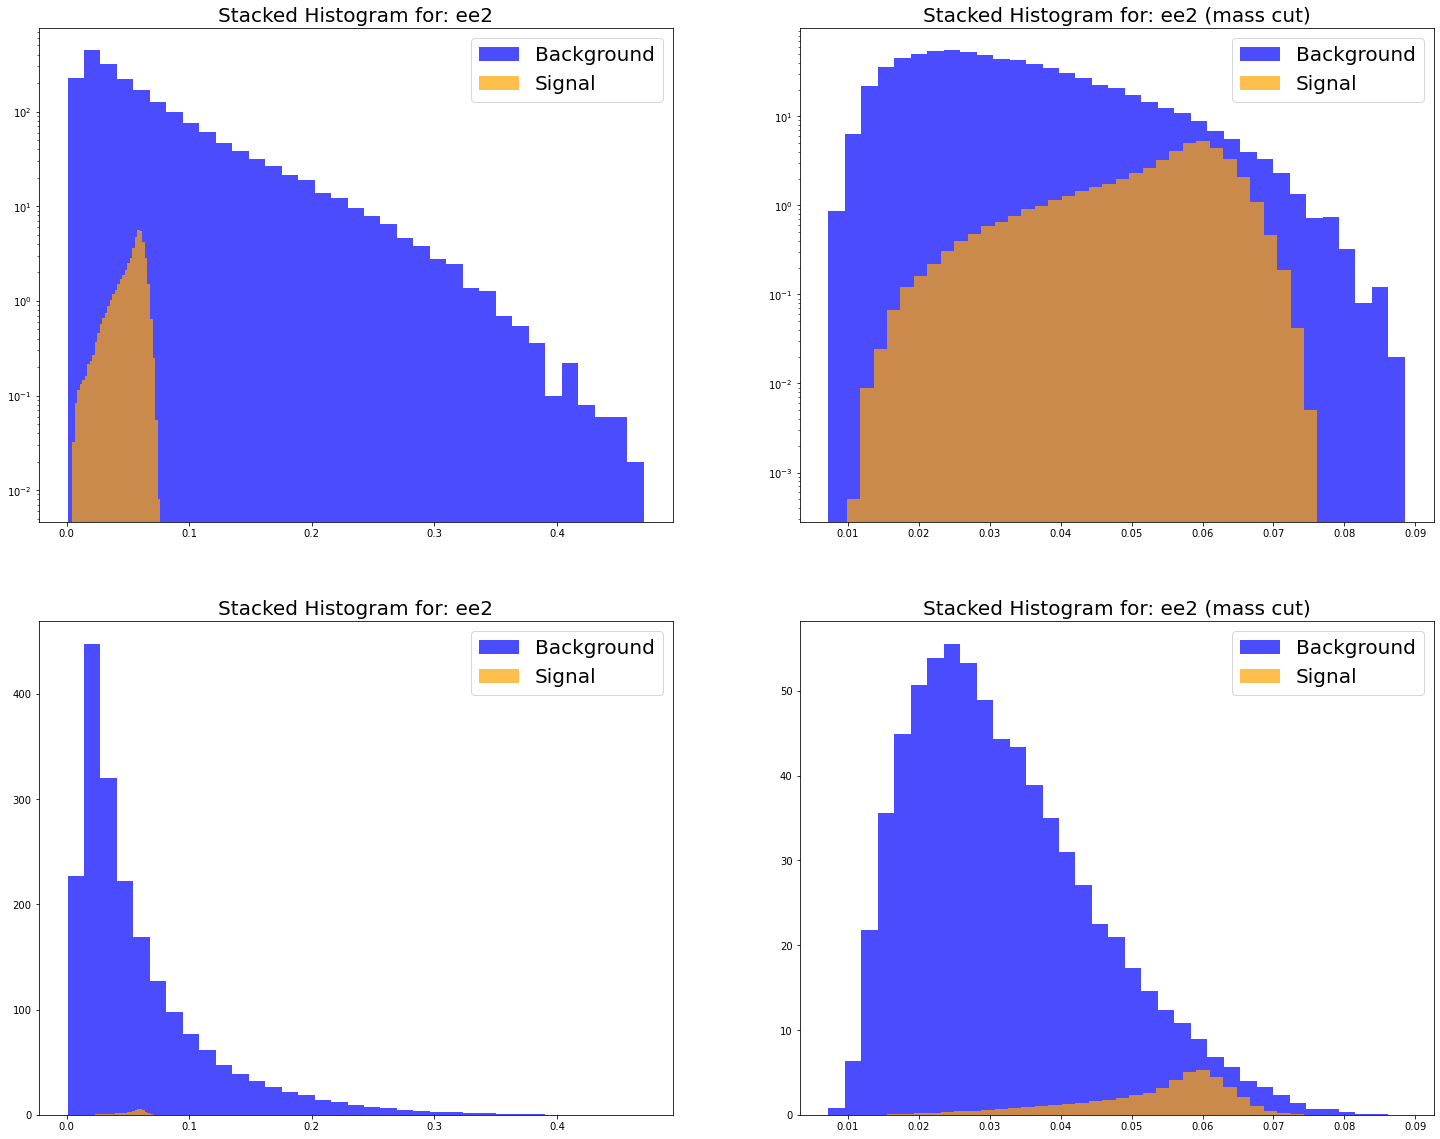

In [36]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['ee2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['ee2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: ee2', size = 20)

ax[0,1].hist(backgrounddf_mc['ee2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['ee2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: ee2 (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['ee2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['ee2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: ee2', size = 20)

ax[1,1].hist(backgrounddf_mc['ee2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['ee2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: ee2 (mass cut)', size = 20)
;

This one is a good parameter to make a cut at 0.03 < ee2 < 0.08 for an increase in significance, not as good as the mass cut. Mass cut had a significant effect on the background for ee2.

''

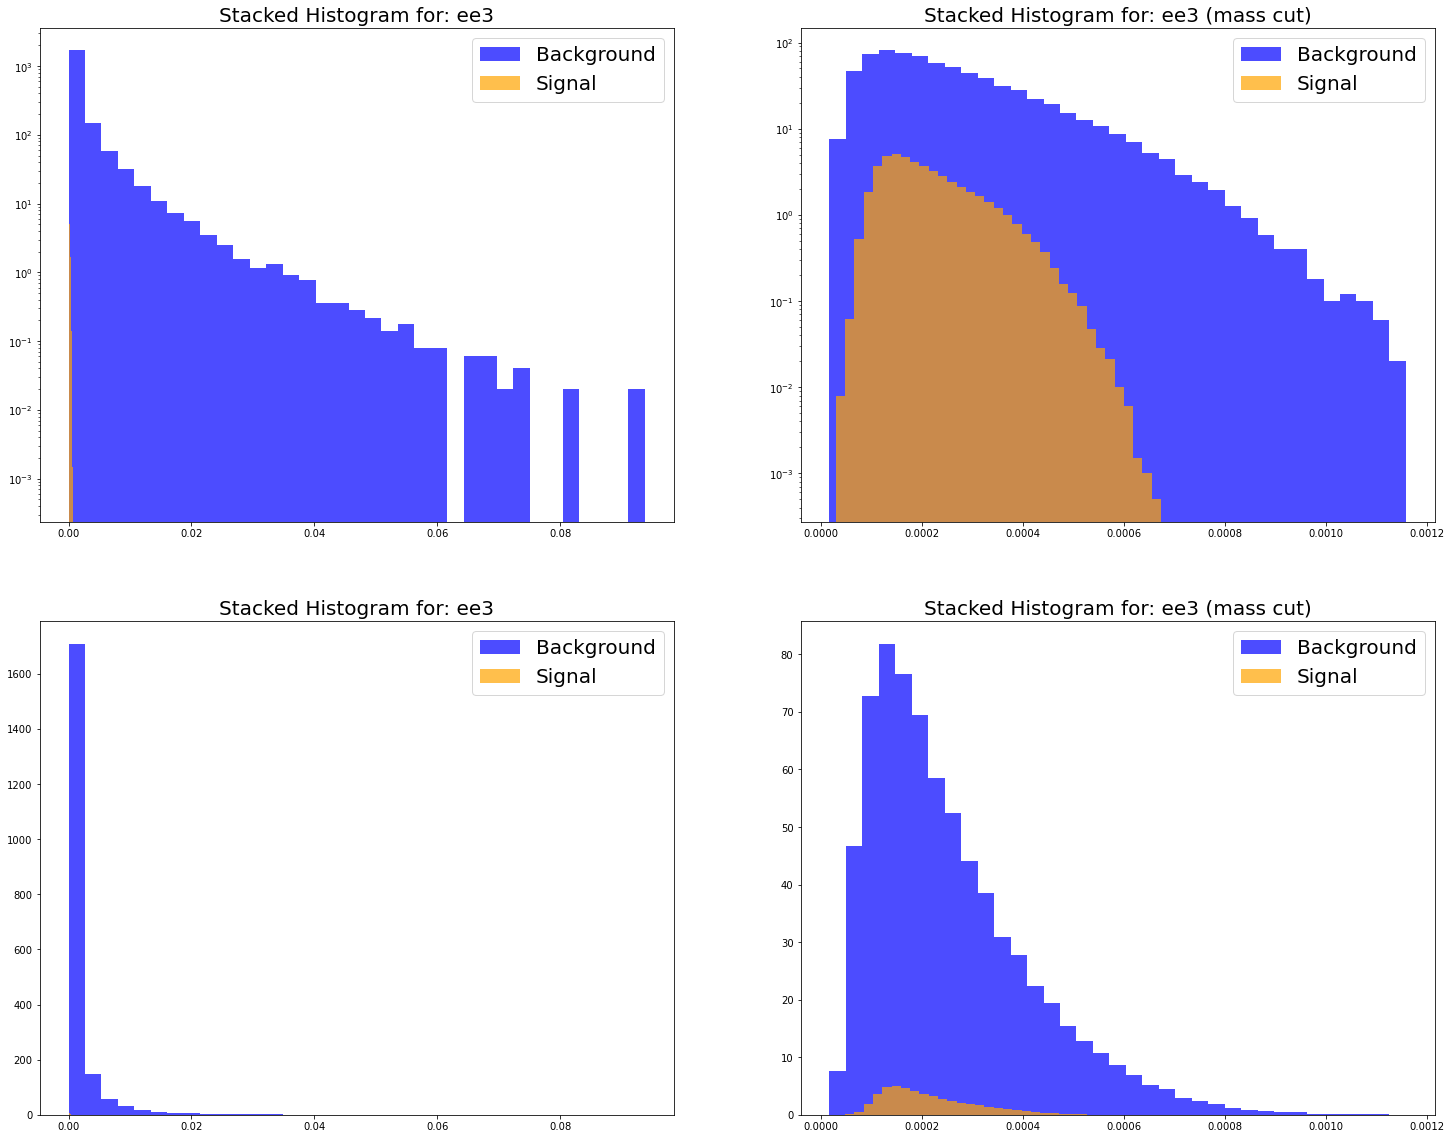

In [37]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['ee3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['ee3'], bins = 35, color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: ee3', size = 20)

ax[0,1].hist(backgrounddf_mc['ee3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['ee3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: ee3 (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['ee3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['ee3'], bins = 35, color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: ee3', size = 20)

ax[1,1].hist(backgrounddf_mc['ee3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['ee3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: ee3 (mass cut)', size = 20)
;

Another good candidate for a cut, ee3 < 0.0005 for a slight increase in significance. The mass cut, in this case, reduced the background dramatically, but we can still do better.

''

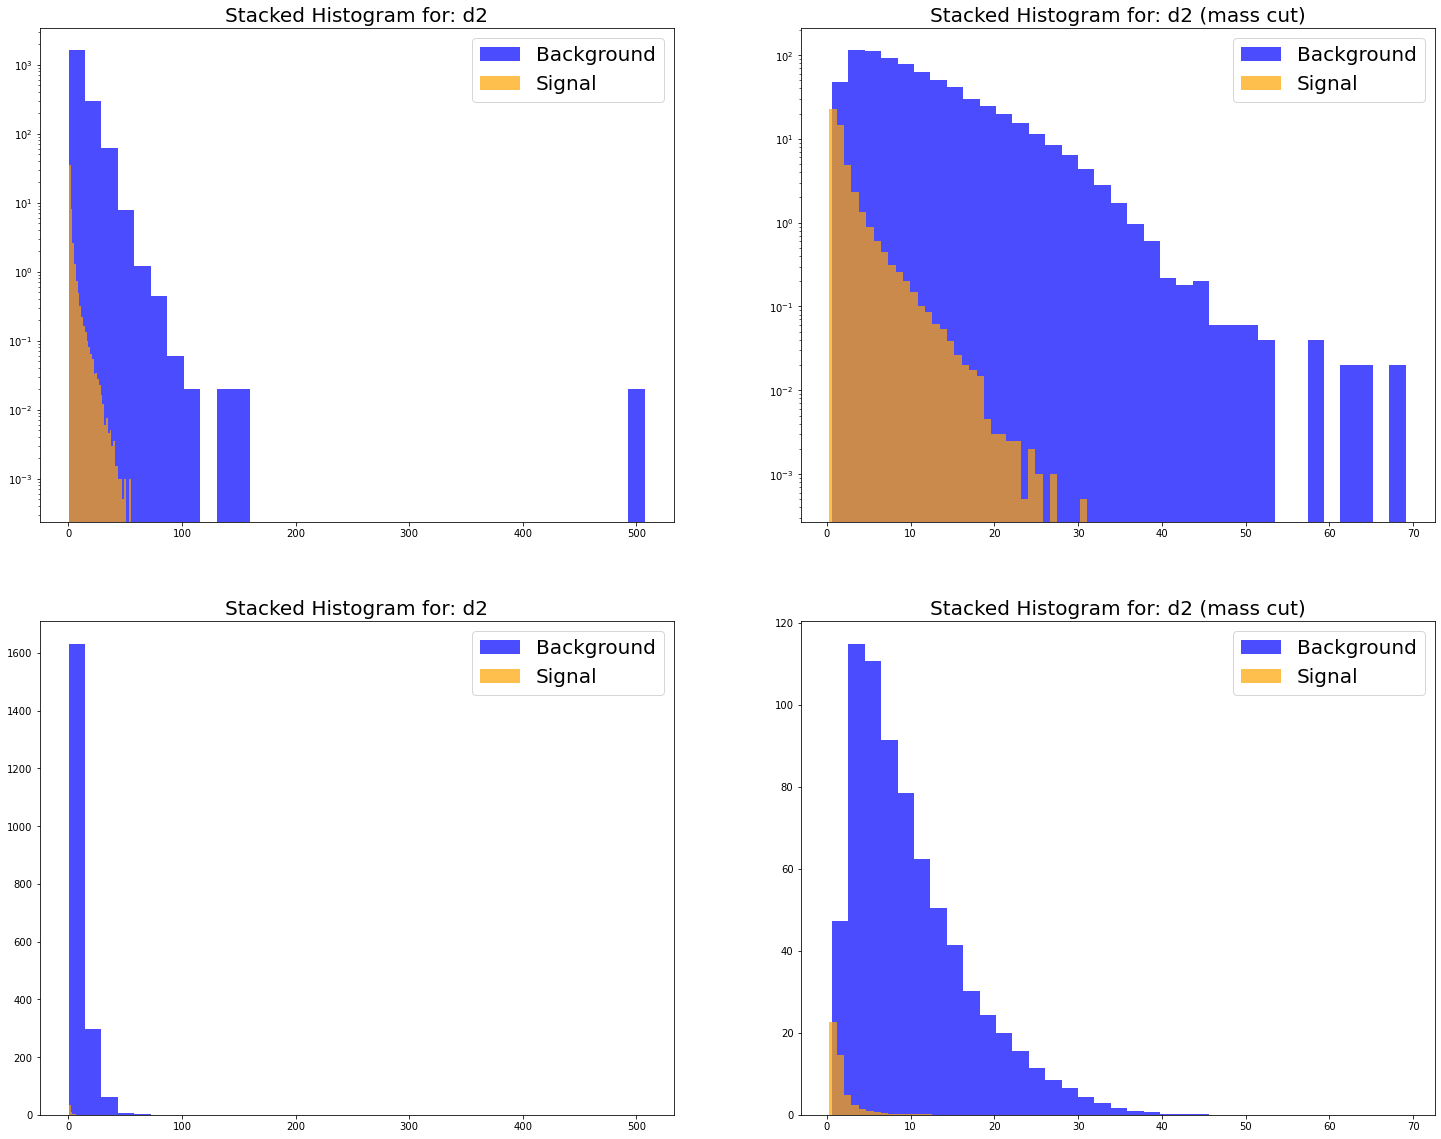

In [38]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))


ax[0,0].hist(backgrounddf['d2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['d2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: d2', size = 20)

ax[0,1].hist(backgrounddf_mc['d2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['d2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: d2 (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['d2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['d2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: d2', size = 20)

ax[1,1].hist(backgrounddf_mc['d2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['d2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: d2 (mass cut)', size = 20)
;

Could cut here for d2 < 10. Pretty good effect with the mass cut.

''

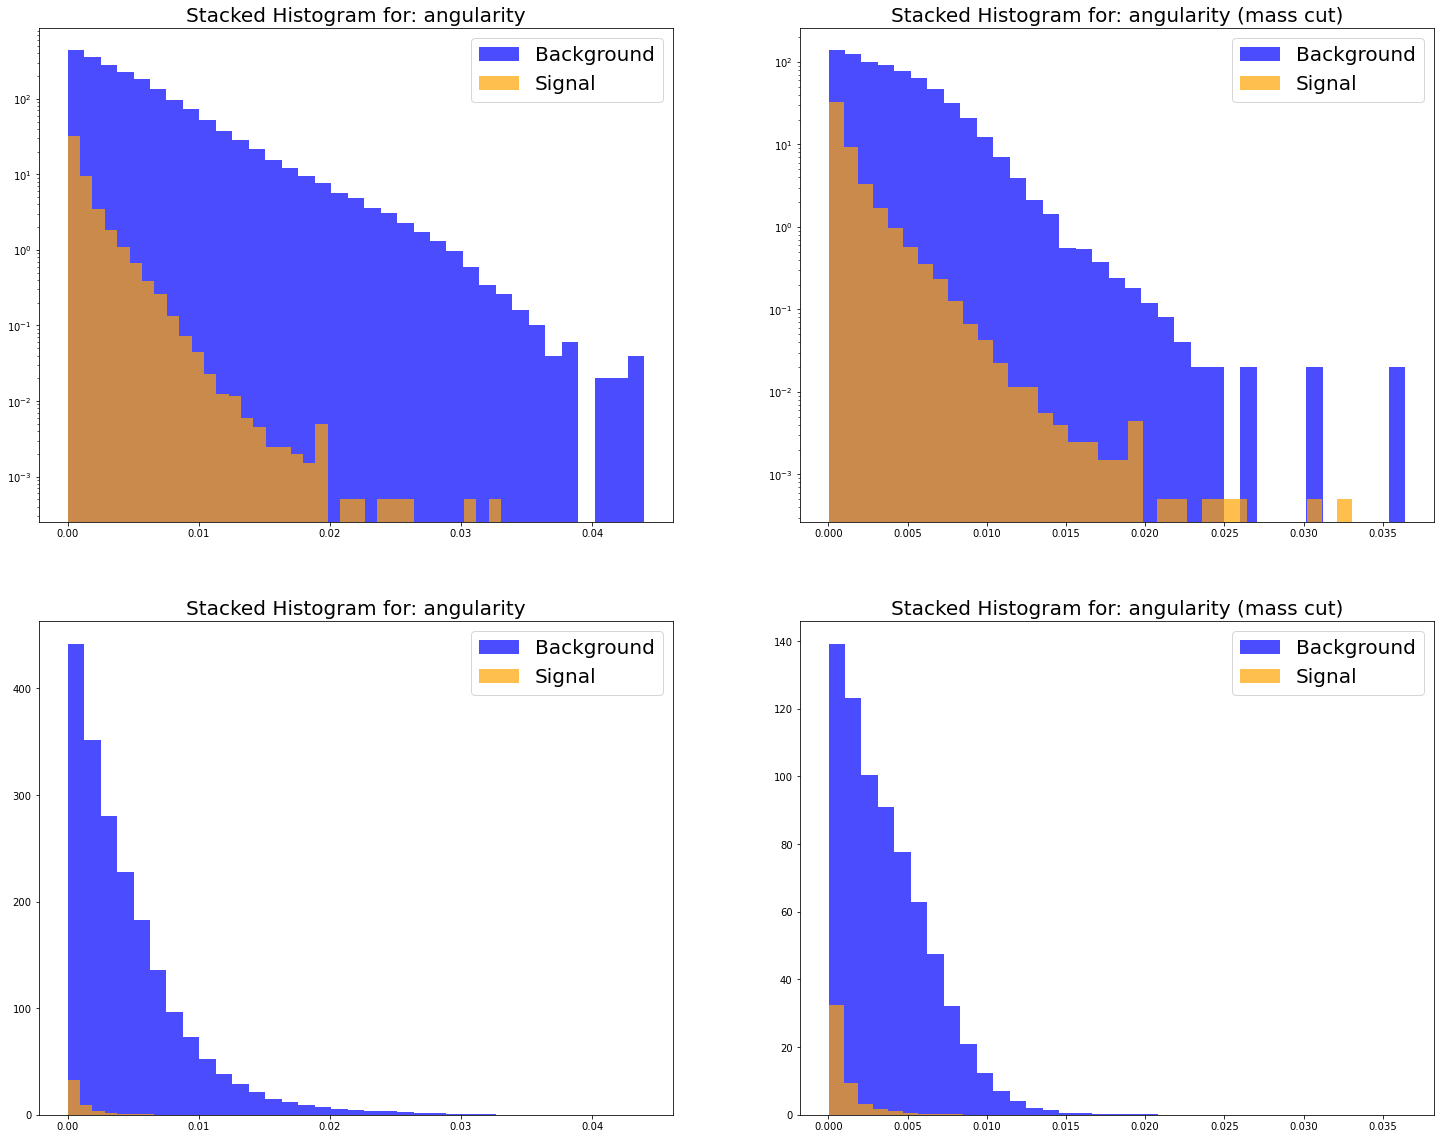

In [39]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['angularity'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['angularity'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: angularity', size = 20)

ax[0,1].hist(backgrounddf_mc['angularity'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['angularity'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: angularity (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['angularity'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['angularity'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: angularity', size = 20)

ax[1,1].hist(backgrounddf_mc['angularity'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['angularity'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: angularity (mass cut)', size = 20)
;

Could cut angularity < 0.005, Mass cut seems to reduce the background 

''

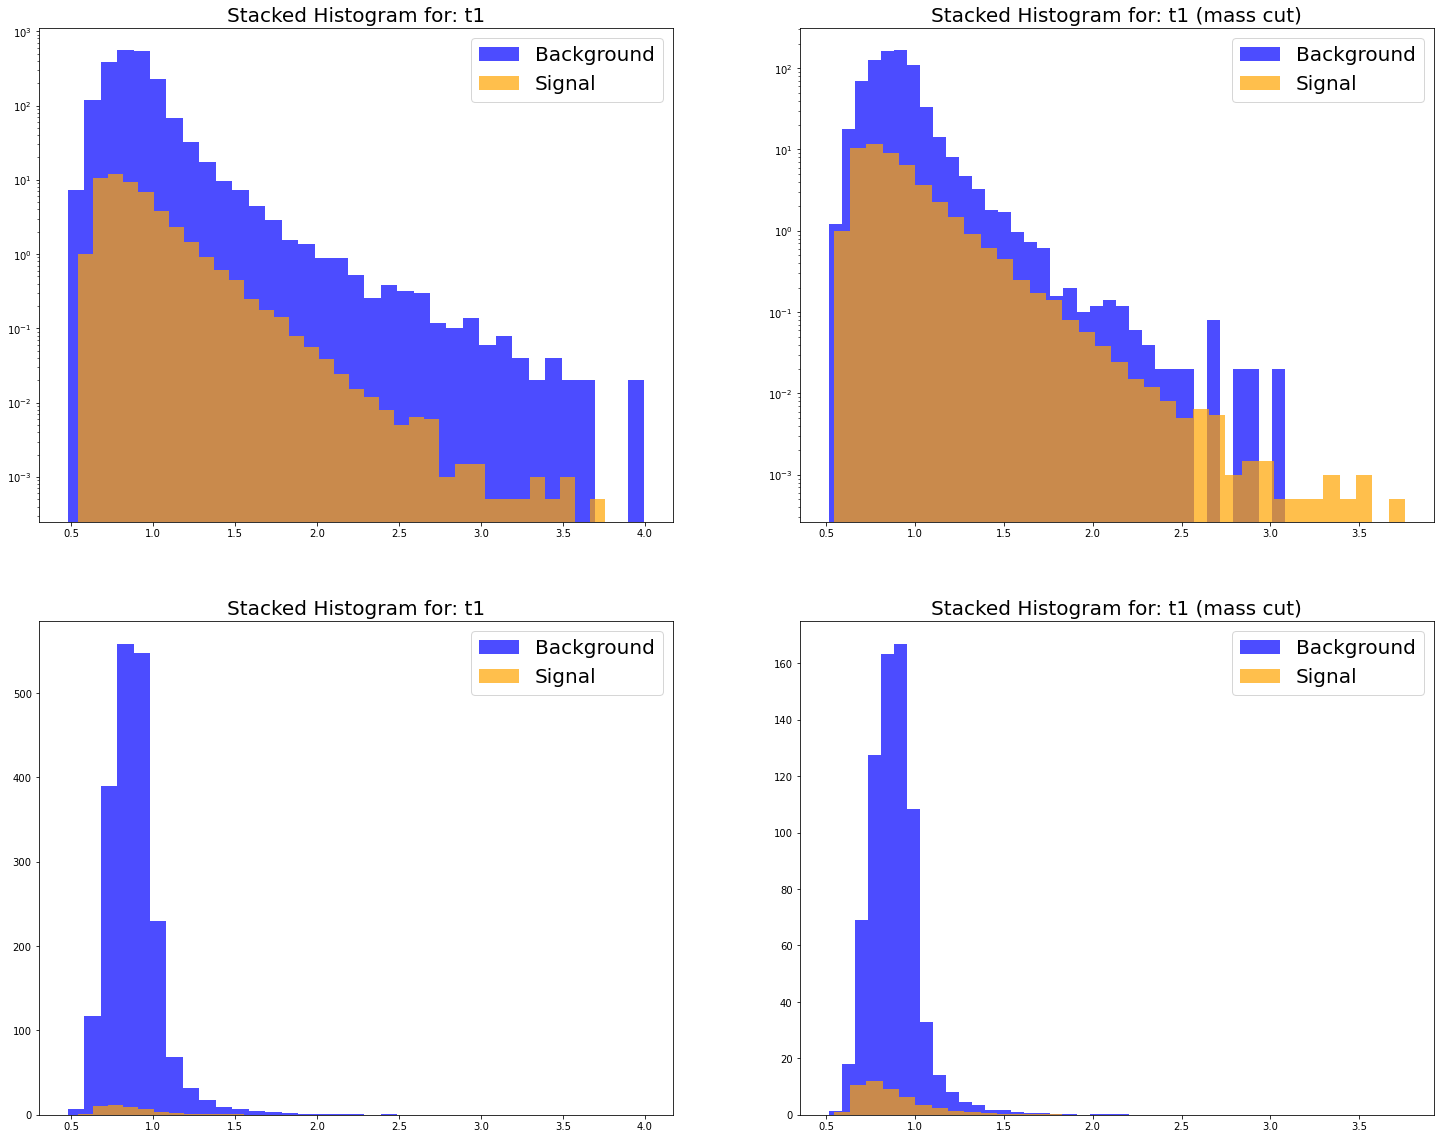

In [40]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['t1'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['t1'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: t1', size = 20)

ax[0,1].hist(backgrounddf_mc['t1'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['t1'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: t1 (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['t1'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['t1'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: t1', size = 20)

ax[1,1].hist(backgrounddf_mc['t1'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['t1'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: t1 (mass cut)', size = 20)
;

No need to make a cut here, mass cuts reduced the background significantly.

''

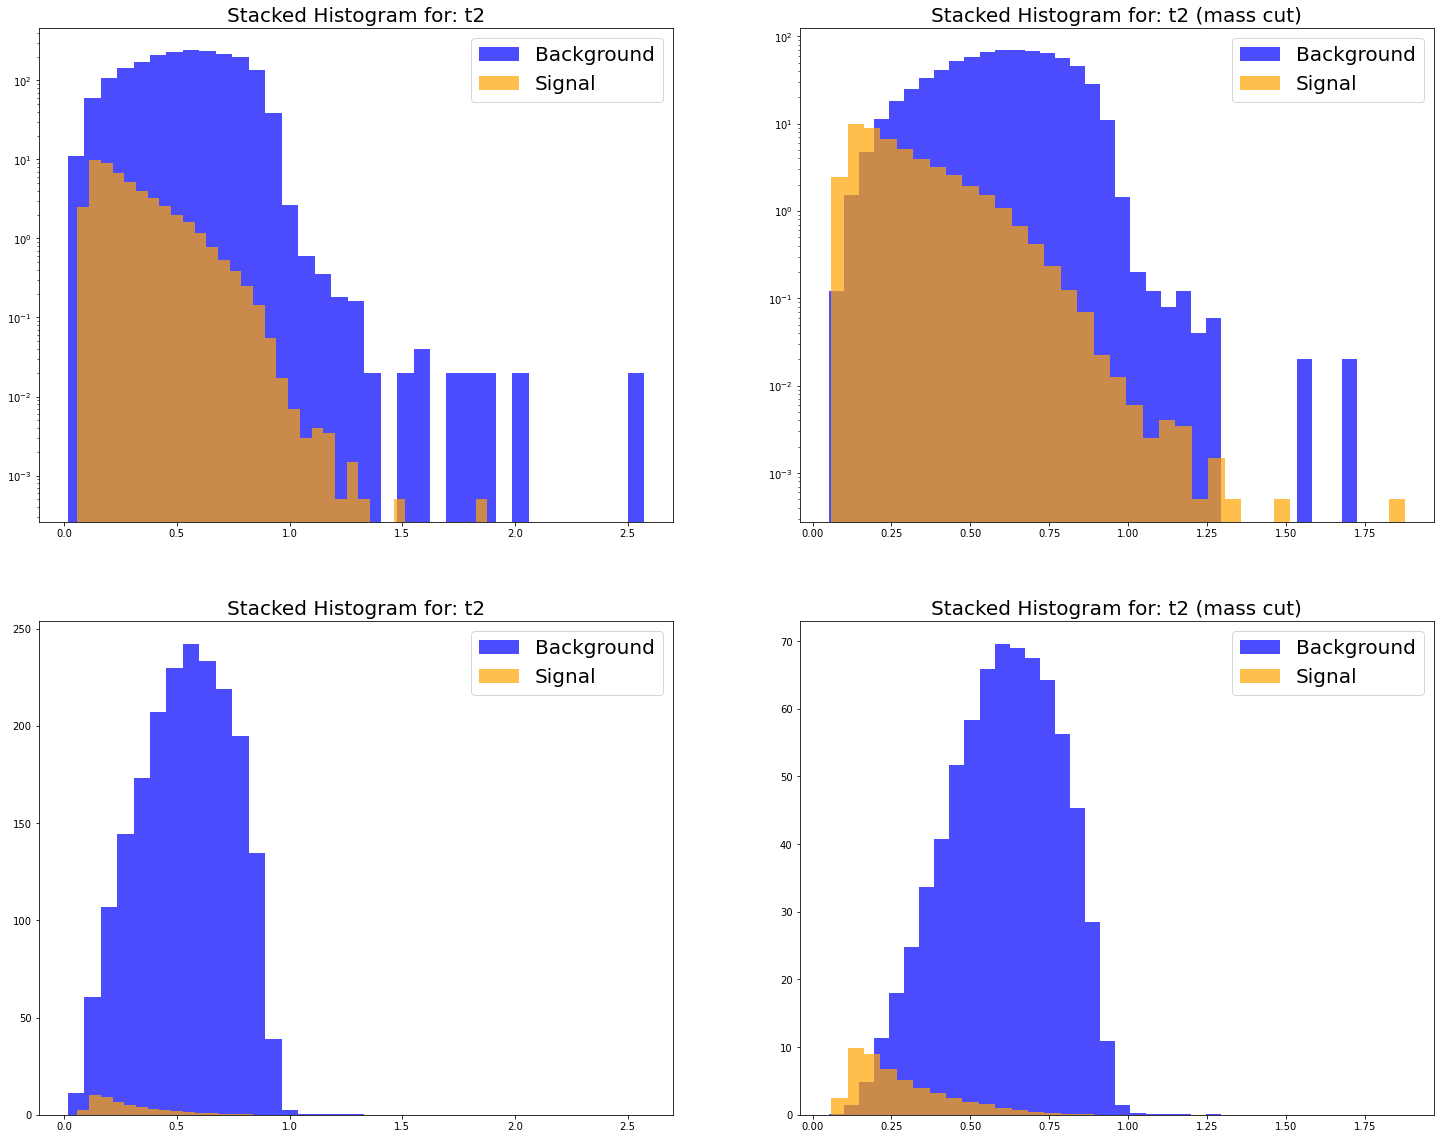

In [41]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['t2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['t2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: t2', size = 20)

ax[0,1].hist(backgrounddf_mc['t2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['t2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: t2 (mass cut)', size = 20)

ax[1,0].hist(backgrounddf['t2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['t2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: t2', size = 20)

ax[1,1].hist(backgrounddf_mc['t2'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['t2'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: t2 (mass cut)', size = 20)
;

Again, mass cuts worked well. But can increase significance a bit by cutting t2 < 0.75

''

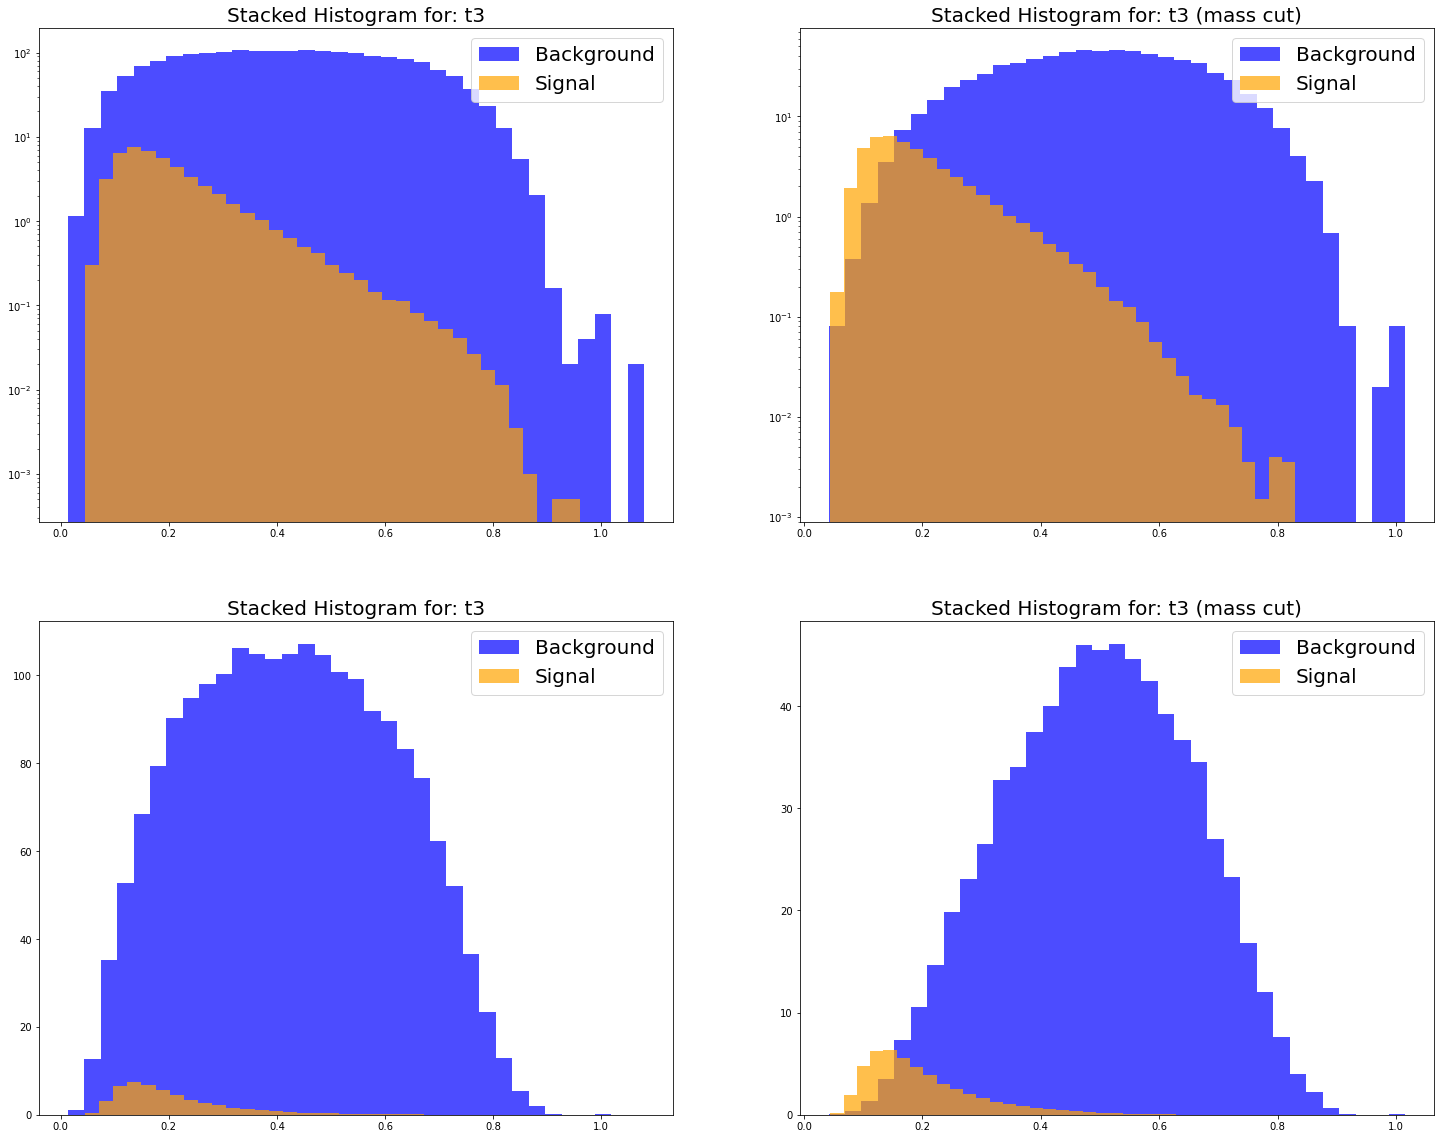

In [42]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['t3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['t3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: t3', size = 20)

ax[0,1].hist(backgrounddf_mc['t3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['t3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: t3 (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['t3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['t3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: t3', size = 20)

ax[1,1].hist(backgrounddf_mc['t3'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['t3'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: t3 (mass cut)', size = 20)
;

Mass cut worked well here. Should be able to increase significance a lot by cutting t3 < 0.4.

''

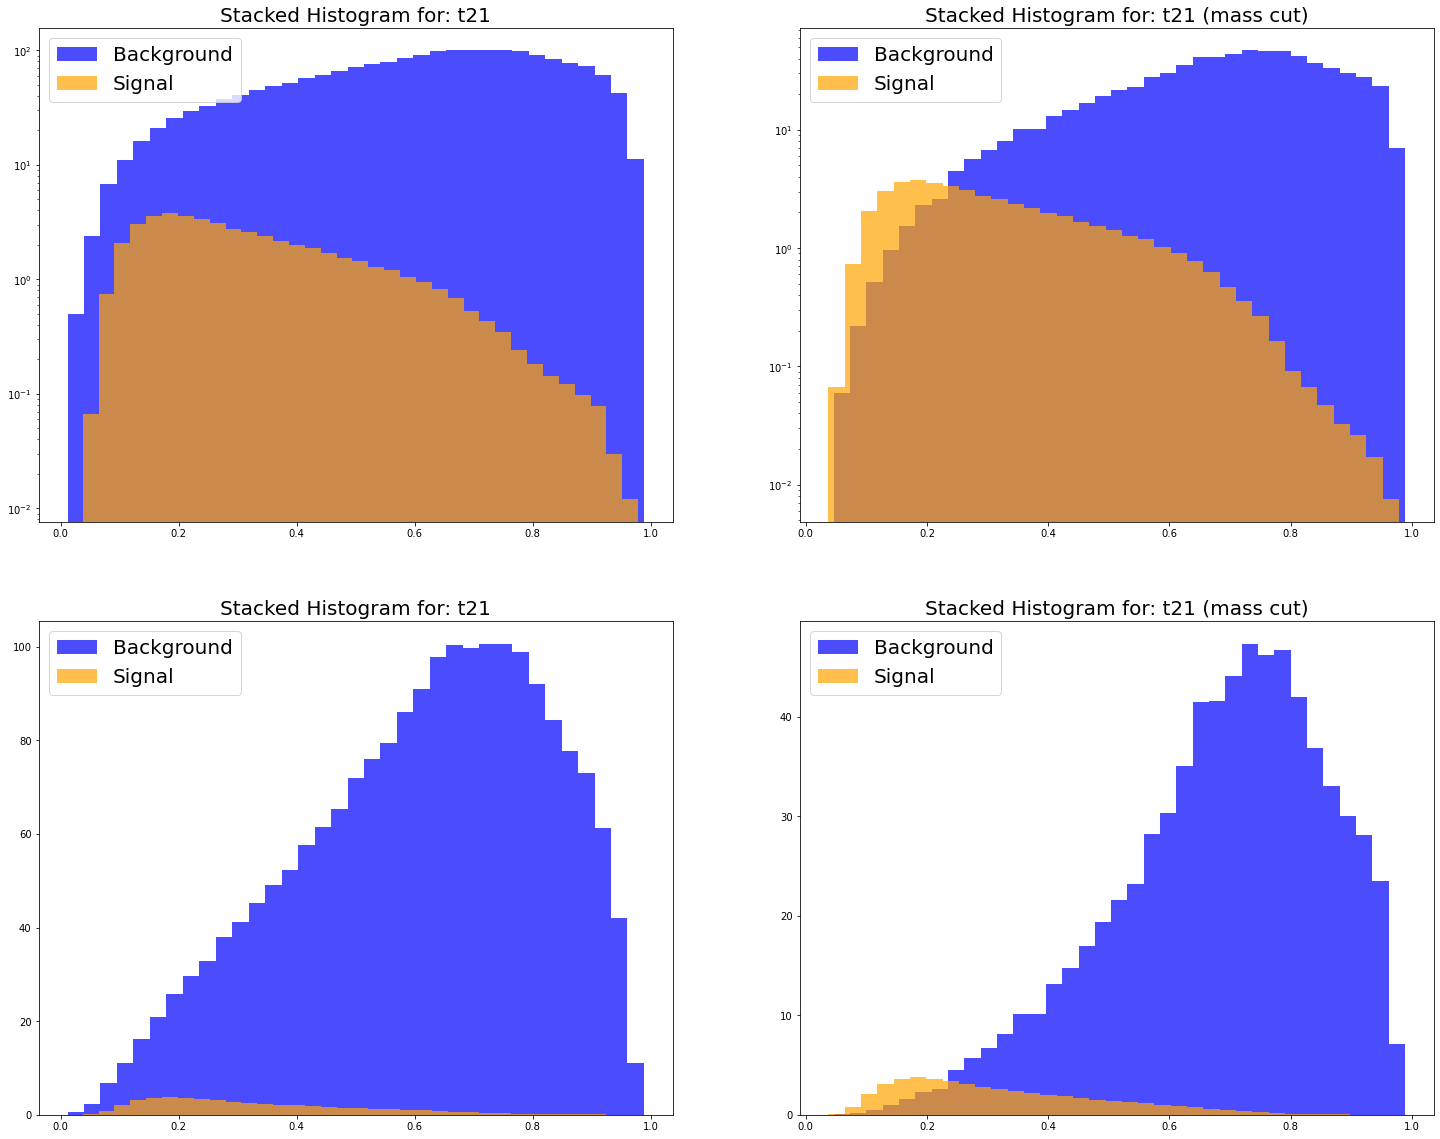

In [43]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['t21'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['t21'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: t21', size = 20)

ax[0,1].hist(backgrounddf_mc['t21'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['t21'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: t21 (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['t21'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['t21'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: t21', size = 20)

ax[1,1].hist(backgrounddf_mc['t21'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['t21'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: t21 (mass cut)', size = 20)
;

Again, mass cut was very effective. Can get a great increase in significance by cutting t21 < 0.5

''

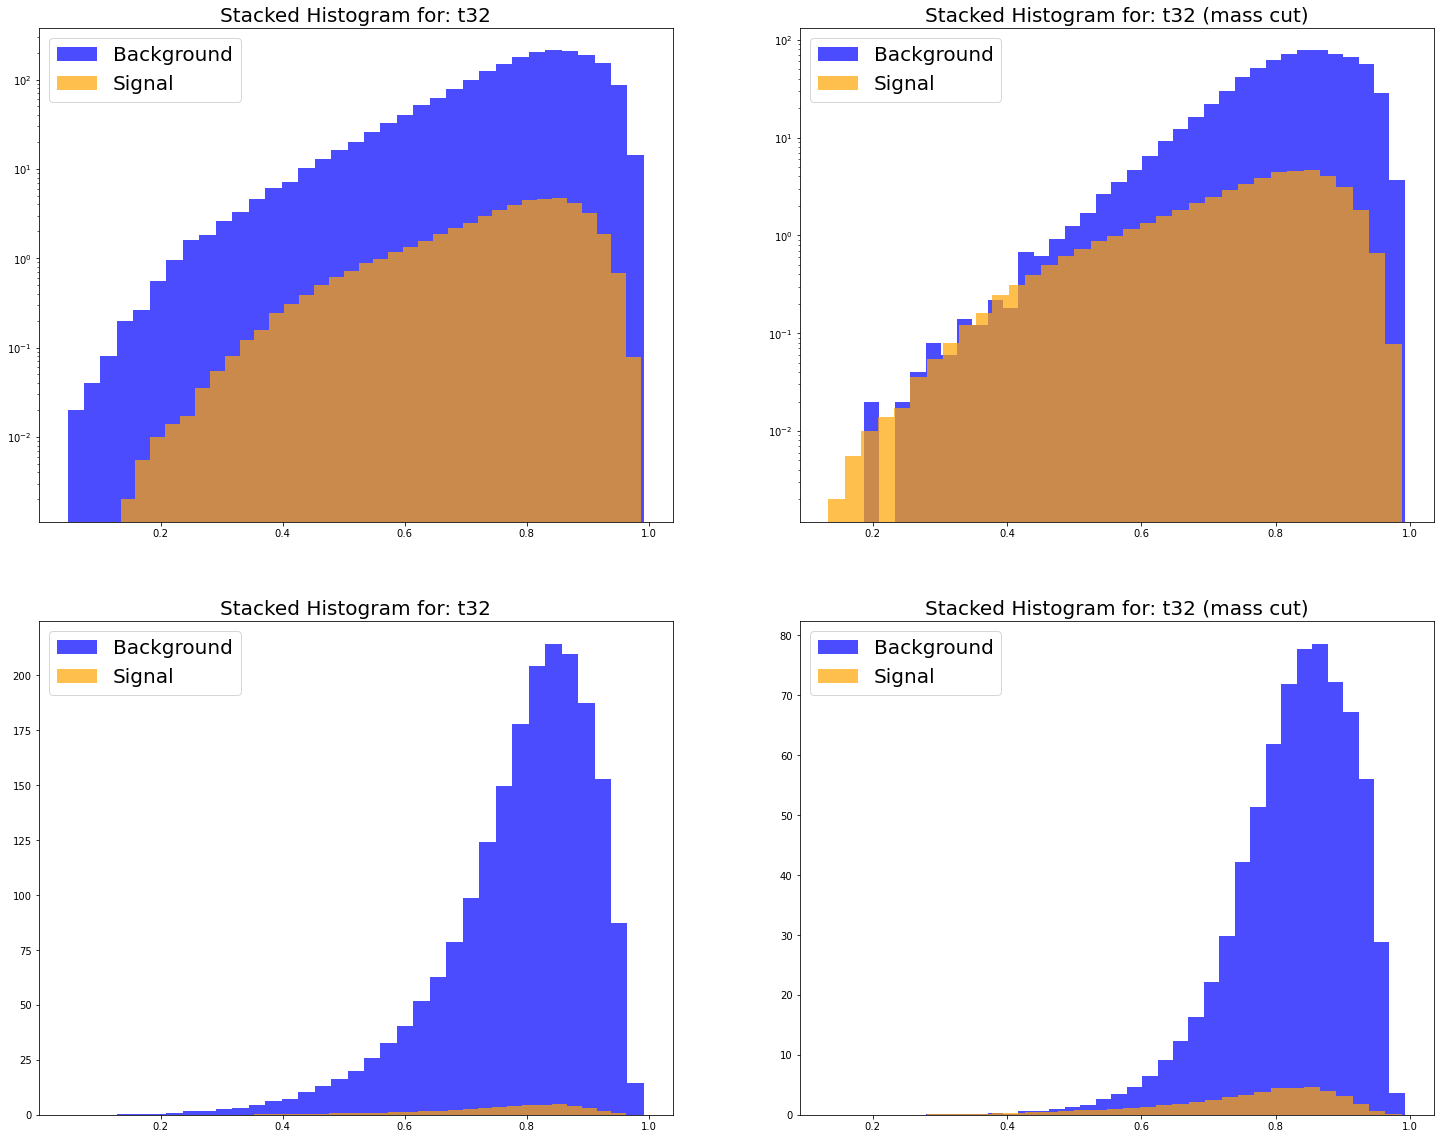

In [44]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['t32'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['t32'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: t32', size = 20)

ax[0,1].hist(backgrounddf_mc['t32'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['t32'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: t32 (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['t32'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['t32'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: t32', size = 20)

ax[1,1].hist(backgrounddf_mc['t32'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['t32'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: t32 (mass cut)', size = 20)
;

No useful cuts.

''

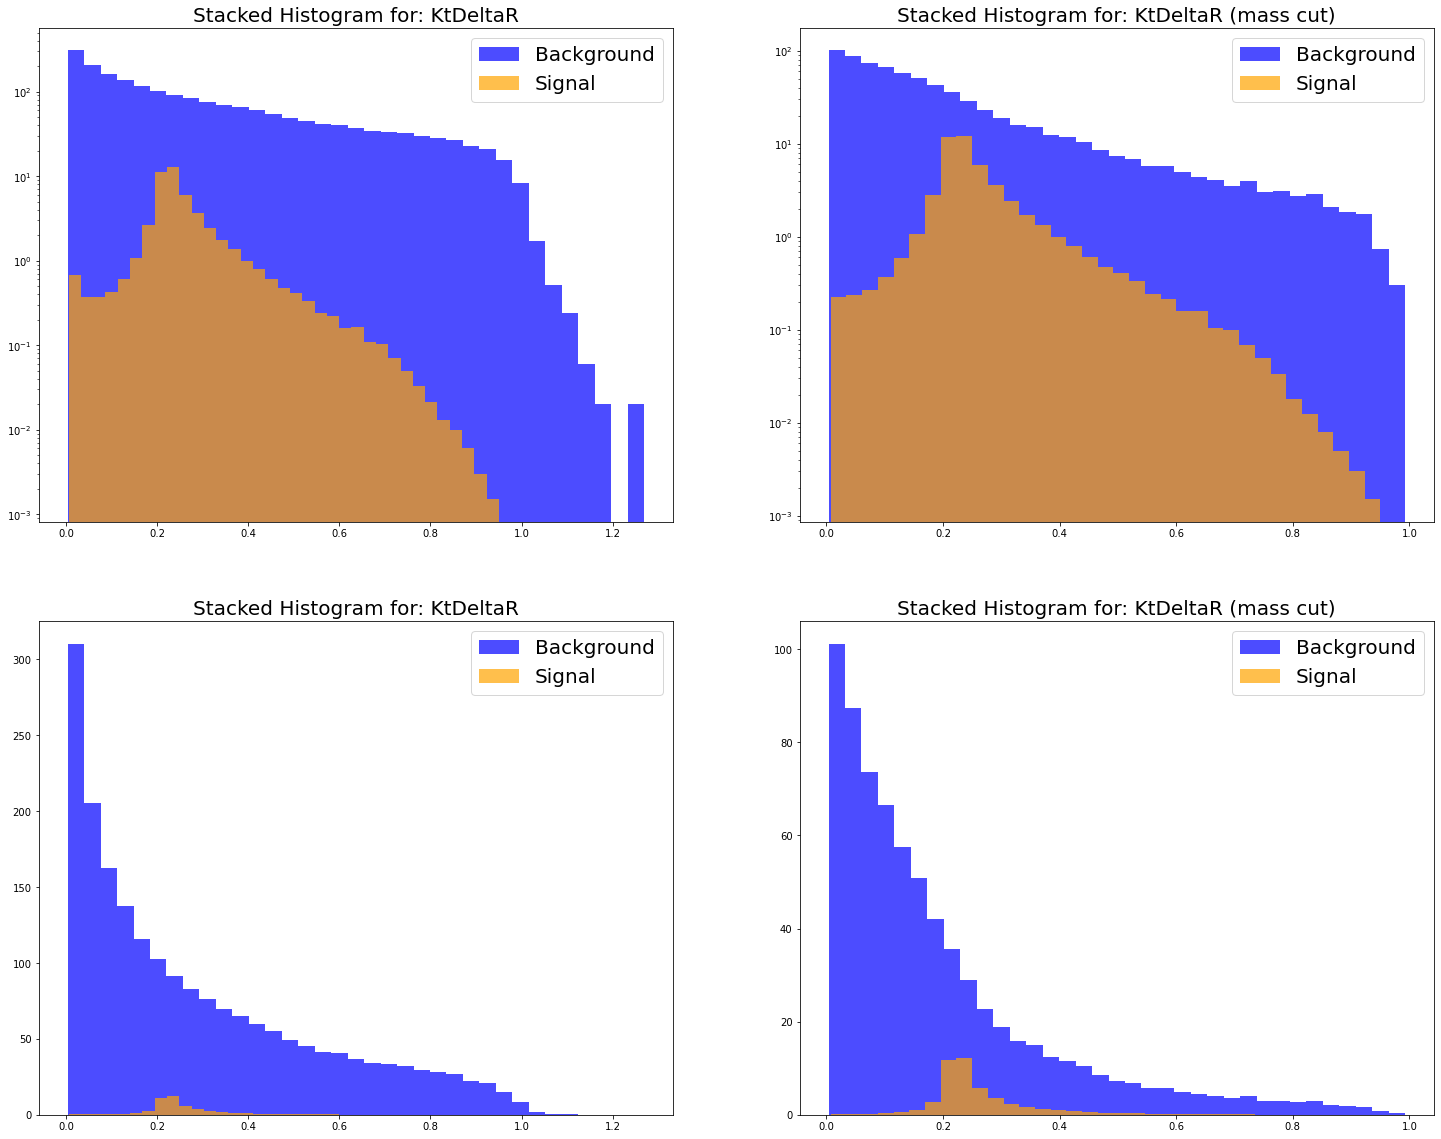

In [45]:
fig, ax = plt.subplots(2,2, figsize = (25, 20))

ax[0,0].hist(backgrounddf['KtDeltaR'], bins = 35, color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[0,0].hist(signaldf['KtDeltaR'], bins = 35, color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[0,0].set_yscale('log')
ax[0,0].legend(prop = {'size': 20})
ax[0,0].set_title('Stacked Histogram for: KtDeltaR', size = 20)

ax[0,1].hist(backgrounddf_mc['KtDeltaR'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[0,1].hist(signaldf_mc['KtDeltaR'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[0,1].set_yscale('log')
ax[0,1].legend(prop = {'size': 20})
ax[0,1].set_title('Stacked Histogram for: KtDeltaR (mass cut)', size = 20)


ax[1,0].hist(backgrounddf['KtDeltaR'], bins = 35, color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'])))
ax[1,0].hist(signaldf['KtDeltaR'], bins = 35, color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'])))
ax[1,0].legend(prop = {'size': 20})
ax[1,0].set_title('Stacked Histogram for: KtDeltaR', size = 20)

ax[1,1].hist(backgrounddf_mc['KtDeltaR'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_mc['mass'])))
ax[1,1].hist(signaldf_mc['KtDeltaR'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_mc['mass'])))
ax[1,1].legend(prop = {'size': 20})
ax[1,1].set_title('Stacked Histogram for: KtDeltaR (mass cut)', size = 20)
;

Could cut 0.15 < KtDeltaR < 0.4 here for a pretty decent increase in significance.

Potential cut summary:

* $eta<|1.5|$
* $0.03 < ee2 < 0.08$
* $ee3 < 0.0005$
* $d2 < 10$
* $angularity < 0.005$
* $t2 < 0.75$
* $t3 < 0.4$
* $t21 < 0.5$
* $0.15 < KtDeltaR < 0.4$


#### Other features as descriminative as mass?

In [46]:
eta_mask_prior = (backgrounddf['eta'] > -1.5) & (backgrounddf['eta'] < 1.5) 
ee2_mask_prior = (backgrounddf['ee2'] > 0.03) & (backgrounddf['ee2'] < 0.08)
ee3_mask_prior = backgrounddf['ee3'] < 0.0005
d2_mask_prior = backgrounddf['d2'] < 10
angularity_mask_prior = backgrounddf['angularity'] < 0.005
t2_mask_prior = backgrounddf['t2'] < 0.75
t3_mask_prior = backgrounddf['t3'] < 0.4
t21_mask_prior = backgrounddf['t21'] < 0.5
ktdeltar_mask_prior = (backgrounddf['KtDeltaR'] > 0.15) & (backgrounddf['KtDeltaR'] < 0.4)

eta_mask_prior_s = (signaldf['eta'] > -1.5) & (signaldf['eta'] < 1.5) 
ee2_mask_prior_s = (signaldf['ee2'] > 0.03) & (signaldf['ee2'] < 0.08)
ee3_mask_prior_s = signaldf['ee3'] < 0.0005
d2_mask_prior_s = signaldf['d2'] < 10
angularity_mask_prior_s = signaldf['angularity'] < 0.005
t2_mask_prior_s = signaldf['t2'] < 0.75
t3_mask_prior_s = signaldf['t3'] < 0.4
t21_mask_prior_s = signaldf['t21'] < 0.5
ktdeltar_mask_prior_s = (signaldf['KtDeltaR'] > 0.15) & (signaldf['KtDeltaR'] < 0.4)

In [47]:
cut_eta = backgrounddf['eta'][eta_mask_prior]
cut_ee2 = backgrounddf['ee2'][ee2_mask_prior]
cut_ee3 = backgrounddf['ee3'][ee3_mask_prior]
cut_d2 = backgrounddf['d2'][d2_mask_prior]
cut_angularity = backgrounddf['angularity'][angularity_mask_prior]
cut_t2 = backgrounddf['t2'][t2_mask_prior]
cut_t3 = backgrounddf['t3'][t3_mask_prior]
cut_t21 = backgrounddf['t21'][t21_mask_prior]
cut_ktdeltar = backgrounddf['KtDeltaR'][ktdeltar_mask_prior]

cut_eta_s = signaldf['eta'][eta_mask_prior_s]
cut_ee2_s = signaldf['ee2'][ee2_mask_prior_s]
cut_ee3_s = signaldf['ee3'][ee3_mask_prior_s]
cut_d2_s = signaldf['d2'][d2_mask_prior_s]
cut_angularity_s = signaldf['angularity'][angularity_mask_prior_s]
cut_t2_s = signaldf['t2'][t2_mask_prior_s]
cut_t3_s = signaldf['t3'][t3_mask_prior_s]
cut_t21_s = signaldf['t21'][t21_mask_prior_s]
cut_ktdeltar_s = signaldf['KtDeltaR'][ktdeltar_mask_prior_s]

In [48]:
n_eta_p, temp1, temp2 = plt.hist(cut_eta, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_eta)))
n_ee2_p, temp1, temp2 = plt.hist(cut_ee2, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_ee2)))
n_ee3_p, temp1, temp2 = plt.hist(cut_ee3, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_ee3)))
n_d2_p, temp1, temp2 = plt.hist(cut_d2, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_d2)))
n_angularity_p, temp1, temp2 = plt.hist(cut_angularity, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_angularity)))
n_t2_p, temp1, temp2 = plt.hist(cut_t2, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_t2)))
n_t3_p, temp1, temp2 = plt.hist(cut_t3, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_t3)))
n_t21_p, temp1, temp2 = plt.hist(cut_t21, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_t21)))
n_ktdeltar_p, temp1, temp2 = plt.hist(cut_ktdeltar, bins = 35, weights = np.repeat((2000/len(backgrounddf['mass'])), len(cut_ktdeltar)))


n_eta_p_s, temp1, temp2 = plt.hist(cut_eta_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_eta_s)))
n_ee2_p_s, temp1, temp2 = plt.hist(cut_ee2_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_ee2_s)))
n_ee3_p_s, temp1, temp2 = plt.hist(cut_ee3_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_ee3_s)))
n_d2_p_s, temp1, temp2 = plt.hist(cut_d2_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_d2_s)))
n_angularity_p_s, temp1, temp2 = plt.hist(cut_angularity_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_angularity_s)))
n_t2_p_s, temp1, temp2 = plt.hist(cut_t2_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_t2_s)))
n_t3_p_s, temp1, temp2 = plt.hist(cut_t3_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_t3_s)))
n_t21_p_s, temp1, temp2 = plt.hist(cut_t21_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_t21_s)))
n_ktdeltar_p_s, temp1, temp2 = plt.hist(cut_ktdeltar_s, bins = 35, weights = np.repeat((50/len(signaldf['mass'])), len(cut_ktdeltar_s)))

plt.close()

In [49]:
expect_signif_eta = np.sum(n_eta_p_s) / np.sqrt(np.sum(n_eta_p))
expect_signif_ee2 = np.sum(n_ee2_p_s) / np.sqrt(np.sum(n_ee2_p))
expect_signif_ee3 = np.sum(n_ee3_p_s) / np.sqrt(np.sum(n_ee3_p))
expect_signif_d2 = np.sum(n_d2_p_s) / np.sqrt(np.sum(n_d2_p))
expect_signif_angularity = np.sum(n_angularity_p_s) / np.sqrt(np.sum(n_angularity_p))
expect_signif_t2 = np.sum(n_t2_p_s) / np.sqrt(np.sum(n_t2_p))
expect_signif_t3 = np.sum(n_t3_p_s) / np.sqrt(np.sum(n_t3_p))
expect_signif_t21 = np.sum(n_t21_p_s) / np.sqrt(np.sum(n_t21_p))
expect_signif_ktdeltar = np.sum(n_ktdeltar_p_s) / np.sqrt(np.sum(n_ktdeltar_p))

In [50]:
expected_sigs_cuts = [expect_signif_eta, expect_signif_ee2, expect_signif_ee3, expect_signif_d2, expect_signif_angularity, 
 expect_signif_t2, expect_signif_t3, expect_signif_t21, expect_signif_ktdeltar]

In [51]:
expected_sigs_cuts

[1.1478654028891382,
 1.702422881499021,
 1.4861111595961674,
 1.297353216330378,
 1.3488550998749462,
 1.2176092632441236,
 1.5432265990053573,
 1.6686635011064697,
 1.763676543816604]

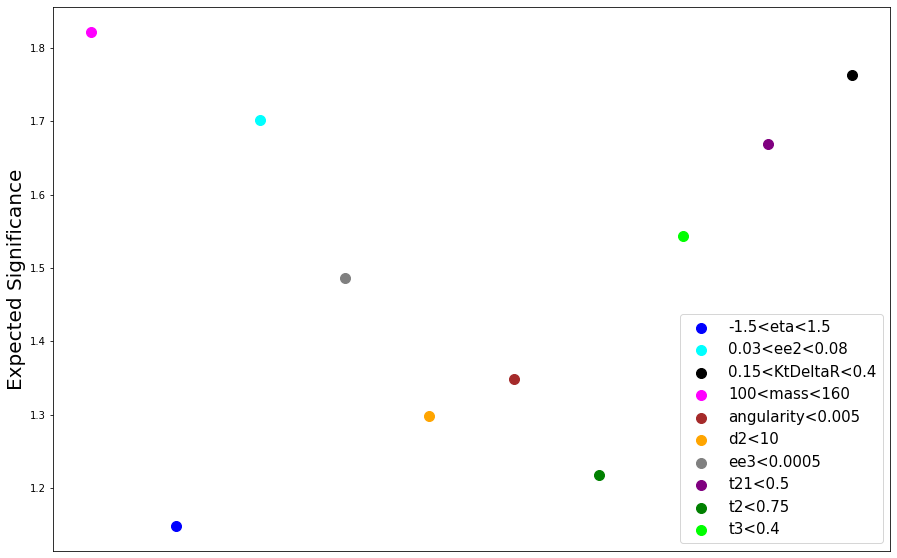

In [52]:
scatter_y = np.array([expect_signif_approx6,expect_signif_eta, expect_signif_ee2, expect_signif_ee3, expect_signif_d2, expect_signif_angularity, 
 expect_signif_t2, expect_signif_t3, expect_signif_t21, expect_signif_ktdeltar])
scatter_x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
group = np.array(['100<mass<160', '-1.5<eta<1.5', '0.03<ee2<0.08','ee3<0.0005','d2<10', 'angularity<0.005', 't2<0.75', 't3<0.4', 't21<0.5', '0.15<KtDeltaR<0.4']
                 , dtype=object)
cdict = {'100<mass<160': 'fuchsia', '-1.5<eta<1.5': 'blue', '0.03<ee2<0.08': 'cyan', 'ee3<0.0005': 'grey', 'd2<10': 'orange',
         'angularity<0.005': 'brown','t2<0.75': 'green', 't3<0.4': 'lime', 't21<0.5': 'purple', '0.15<KtDeltaR<0.4': 'black'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
    #ax.invert_xaxis()
    #ax.set_xlim(11.5,0.5)
    ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
    ax.set_ylabel('Expected Significance', size = 20)
ax.legend(prop={'size':15}, loc = 'best')

It seems that no cut is as descriminative as the mass cut is. We do come close with the KtDeltaR cut, the ee2 cut, and the t21 cut.

### 4. Optimize event selections using multiple features (if necessary)
    * Find a set of feature cuts which achieve high expected significance.
    * Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

First, lets combine the top 2 cuts: mass and KtDeltaR

In [53]:
mass_ktdeltar_mask = ((backgrounddf['mass'] > 100) & (backgrounddf['mass'] < 160)) & (ktdeltar_mask_prior)
mass_ktdeltar_mask_s = ((signaldf['mass'] > 100) & (signaldf['mass'] < 160)) & (signaldf['KtDeltaR'] > 0.15) & (signaldf['KtDeltaR'] < 0.4)

In [54]:
n_c1, temp1, temp2 = plt.hist(backgrounddf['mass'][mass_ktdeltar_mask], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'][mass_ktdeltar_mask])))

n_c1_s, temp1, temp2 = plt.hist(signaldf['mass'][mass_ktdeltar_mask_s], bins = 35,  color = 'blue', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'][mass_ktdeltar_mask_s])))


plt.close()

In [55]:
sig_mk = np.sum(n_c1_s)/np.sqrt(np.sum(n_c1))

In [56]:
sig_mk

2.8099436887603857

Better, but not good enough. Let's just apply ALL THE MASKS!

In [57]:
# Generating master mask with all cuts
big_ole_mask = ((backgrounddf['mass'] > 100) & (backgrounddf['mass'] < 160)) & (ktdeltar_mask_prior) & (eta_mask_prior) & (ee2_mask_prior) & (ee3_mask_prior) & (d2_mask_prior) & (angularity_mask_prior) & (t2_mask_prior) & (t3_mask_prior) & (t21_mask_prior)
big_ole_mask_s = ((signaldf['mass'] > 100) & (signaldf['mass'] < 160)) & (ktdeltar_mask_prior_s) & (eta_mask_prior_s) & (ee2_mask_prior_s) & (ee3_mask_prior_s) & (d2_mask_prior_s) & (angularity_mask_prior_s) & (t2_mask_prior_s) & (t3_mask_prior_s) & (t21_mask_prior_s)        

In [58]:
n_c2, temp1, temp2 = plt.hist(backgrounddf['mass'][big_ole_mask], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf['mass'][big_ole_mask])))

n_c2_s, temp1, temp2 = plt.hist(signaldf['mass'][big_ole_mask_s], bins = 35,  color = 'blue', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf['mass'][big_ole_mask_s])))


plt.close()

In [59]:
sig_all = np.sum(n_c2_s)/np.sqrt(np.sum(n_c2))

In [60]:
backgrounddf_all = backgrounddf[big_ole_mask]
signaldf_all = signaldf[big_ole_mask_s]

''

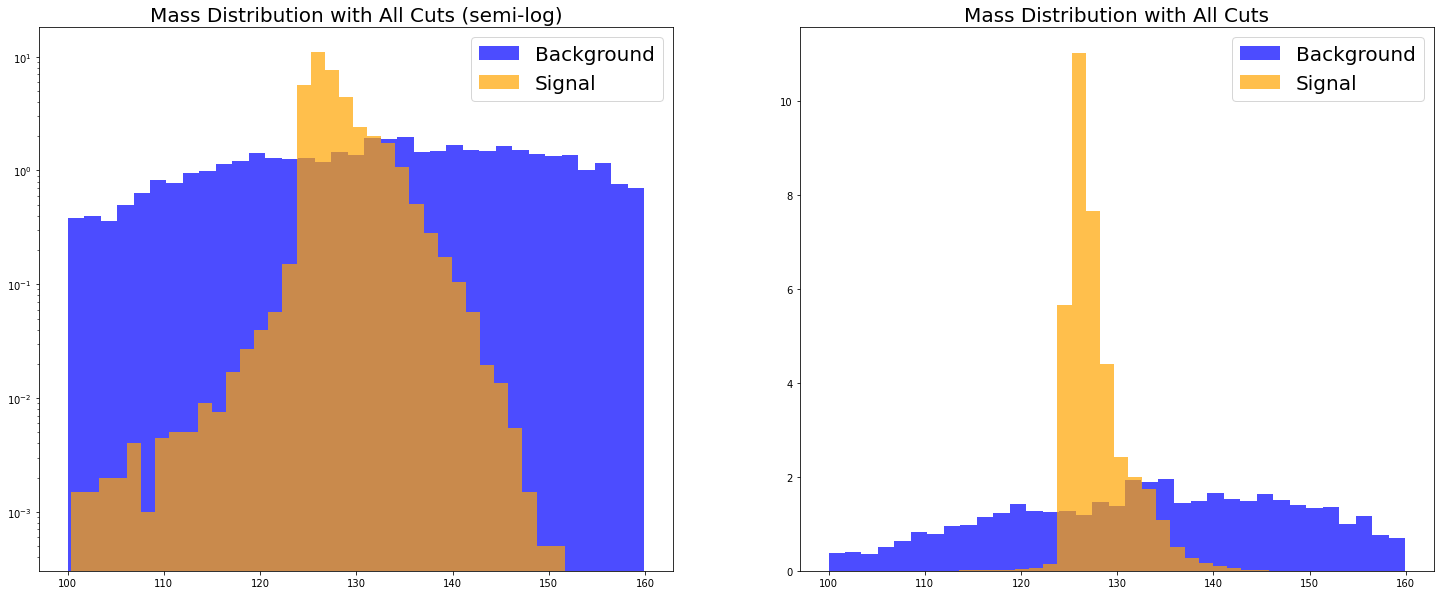

In [61]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

ax[0].hist(backgrounddf_all['mass'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_all['mass'])))
ax[0].hist(signaldf_all['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_all['mass'])))
ax[0].set_yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('Mass Distribution with All Cuts (semi-log)', size = 20)

ax[1].hist(backgrounddf_all['mass'], bins = 35,  color = 'blue', alpha = 0.7, label = 'Background', 
         weights = np.repeat((2000/len(backgrounddf['mass'])), len(backgrounddf_all['mass'])))
ax[1].hist(signaldf_all['mass'], bins = 35,  color = 'orange', alpha = 0.7, label = 'Signal', 
         weights = np.repeat((50/len(signaldf['mass'])), len(signaldf_all['mass'])))
ax[1].legend(prop = {'size': 20})
ax[1].set_title('Mass Distribution with All Cuts', size = 20)

;

In [62]:
print(f'The final expected significance is {sig_all:.2f}!')

The final expected significance is 5.81!


Unfortunately, I cannot compare this result to my lab partner because I cannot get them to communicate with me outside of the scheduled lab times. I have sent them several messages and I never hear back. They also have not posted anything to their github in over 2 months.

# Lab 8

Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using the pseduo-experiment datasets.

### Reading in the data:

In [63]:
dataHigh = pd.read_hdf("/Users/tw94/UW/PHYS_434/data/Lab8/data_highLumi_pt_1000_1200.h5")

In [64]:
dataLow = pd.read_hdf("/Users/tw94/UW/PHYS_434/data/Lab8/data_lowLumi_pt_1000_1200.h5")

In [65]:
dataHigh

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1014.701381,0.320861,1.662700,237.429321,0.119700,0.002641,1.539811,0.008410,1.020637,0.284296,0.259425,0.278548,0.912517,0.356557
1,1040.093465,-0.402904,0.657100,137.024953,0.028117,0.000290,13.035447,0.007623,0.924653,0.883464,0.682923,0.955454,0.773007,0.032092
2,1023.915889,-0.157793,1.352514,161.716106,0.046337,0.000674,6.771647,0.009618,0.938172,0.743193,0.663864,0.792171,0.893260,0.178641
3,1079.532839,-1.356773,-0.683310,85.629307,0.011316,0.000039,27.146507,0.000455,1.033940,0.927058,0.855880,0.896626,0.923222,0.010303
4,1167.522933,0.032726,-1.440446,345.520406,0.156304,0.006467,1.693575,0.011564,0.940346,0.555762,0.382950,0.591018,0.689055,0.349341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1090.490389,-0.383384,0.580866,315.865016,0.148747,0.004730,1.437327,0.008757,0.899599,0.220003,0.165191,0.244556,0.750857,0.463219
4062,1024.261156,0.782132,-1.597681,114.142976,0.020067,0.000148,18.339293,0.003206,0.914173,0.848558,0.782821,0.928225,0.922531,0.015276
4063,1018.257604,0.658496,0.893016,55.924149,0.017371,0.000030,5.665910,0.001219,0.752979,0.345601,0.312060,0.458978,0.902950,0.092592
4064,1198.680592,0.307368,-1.514498,107.594697,0.015019,0.000039,11.637634,0.003877,0.605913,0.216714,0.203449,0.357665,0.938791,0.652686


In [66]:
dataLow

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1019.103763,-0.126256,0.971333,606.144181,0.366305,0.045408,0.923857,0.032897,0.853694,0.363566,0.159485,0.425874,0.438667,0.927449
1,1097.722115,-1.026775,-1.318647,136.198997,0.046489,0.000372,3.702281,0.000907,0.909950,0.650283,0.490157,0.714635,0.753759,0.100155
2,1109.516013,0.147645,1.301173,269.369966,0.129854,0.002386,1.089623,0.005363,1.247856,0.230705,0.181573,0.184881,0.787038,0.407922
3,1154.910626,0.836038,0.272040,293.627489,0.095157,0.003254,3.776053,0.010163,0.753989,0.462067,0.304606,0.612829,0.659226,0.298514
4,1106.100328,0.150553,2.831497,174.127072,0.070252,0.000545,1.572763,0.005132,0.785784,0.124047,0.099418,0.157864,0.801454,0.277085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1125.085037,0.133820,1.415696,176.161322,0.085318,0.000918,1.477743,0.002779,1.082724,0.487478,0.376681,0.450233,0.772714,0.262421
438,1142.878511,-0.563646,-1.692034,242.973633,0.088217,0.001946,2.833835,0.009067,0.829291,0.469421,0.314822,0.566051,0.670660,0.256362
439,1146.873619,-0.641382,-0.941524,216.690343,0.070246,0.001387,4.000989,0.004606,0.830399,0.583299,0.420644,0.702431,0.721147,0.123462
440,1142.946359,-0.424503,-2.159985,96.195083,0.012807,0.000057,27.062195,0.004242,0.923514,0.812622,0.767647,0.879924,0.944654,0.011240


1. High luminosity data
    * For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.
    * Evaluate observed significance and compare your results to expectation.

In [67]:
weights_qcdh_nc = np.repeat((1/len(backgrounddf['mass']))*((4066*2000)/2050), len(backgrounddf['mass']))
weights_higgsh_nc = np.repeat((1/len(signaldf['mass']))*((4066*50)/2050), len(signaldf['mass']))

weights_qcdh_c = np.repeat((1/len(backgrounddf['mass']))*((4066*2000)/2050), len(backgrounddf['mass'][big_ole_mask]))
weights_higgsh_c = np.repeat((1/len(signaldf['mass']))*((4066*50)/2050), len(signaldf['mass'][big_ole_mask_s]))

In [68]:
eta_mask_prior_data = (dataHigh['eta'] > -1.5) & (dataHigh['eta'] < 1.5) 
ee2_mask_prior_data = (dataHigh['ee2'] > 0.03) & (dataHigh['ee2'] < 0.08)
ee3_mask_prior_data = dataHigh['ee3'] < 0.0005
d2_mask_prior_data = dataHigh['d2'] < 10
angularity_mask_prior_data = dataHigh['angularity'] < 0.005
t2_mask_prior_data = dataHigh['t2'] < 0.75
t3_mask_prior_data = dataHigh['t3'] < 0.4
t21_mask_prior_data = dataHigh['t21'] < 0.5
ktdeltar_mask_prior_data = (dataHigh['KtDeltaR'] > 0.15) & (dataHigh['KtDeltaR'] < 0.4)

In [69]:
big_ole_mask_data = ((dataHigh['mass'] > 100) & (dataHigh['mass'] < 160)) & (ktdeltar_mask_prior_data) & (eta_mask_prior_data) & (ee2_mask_prior_data) & (ee3_mask_prior_data) & (d2_mask_prior_data) & (angularity_mask_prior_data) & (t2_mask_prior_data) & (t3_mask_prior_data) & (t21_mask_prior_data)


In [70]:
dataHigh_cut = dataHigh[big_ole_mask_data]

''

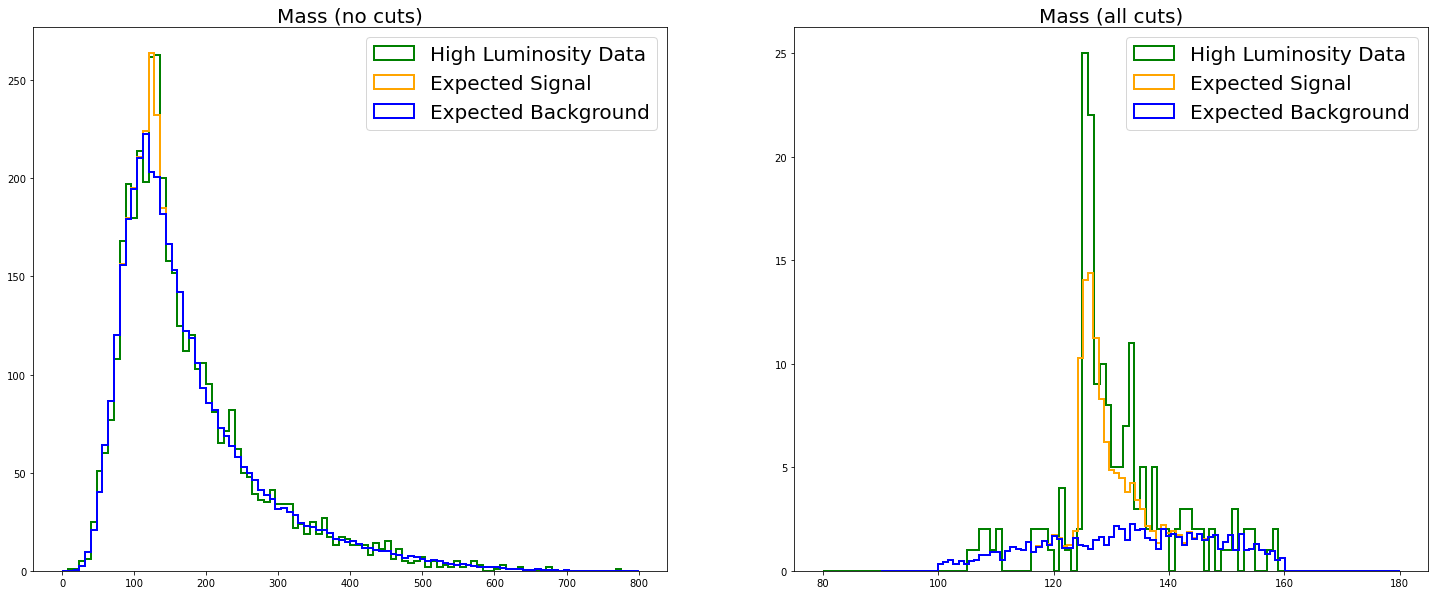

In [71]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_dataHigh_nc, temp1, temp2 = ax[0].hist(dataHigh['mass'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', range = (0,800), histtype = 'step', 
                                     linewidth = 2)

n_nocuts, temp1, temp2 = ax[0].hist((backgrounddf['mass'], signaldf['mass']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, range = (0,800), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('Mass (no cuts)', size = 20)


n_dataHigh_c, temp1, temp2 = ax[1].hist(dataHigh_cut['mass'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', range = (80,180), histtype = 'step', 
                                     linewidth = 2)

n_cuts, temp1, temp2 = ax[1].hist((backgrounddf['mass'][big_ole_mask], signaldf['mass'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, range = (90,180), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('Mass (all cuts)', size = 20)
;

''

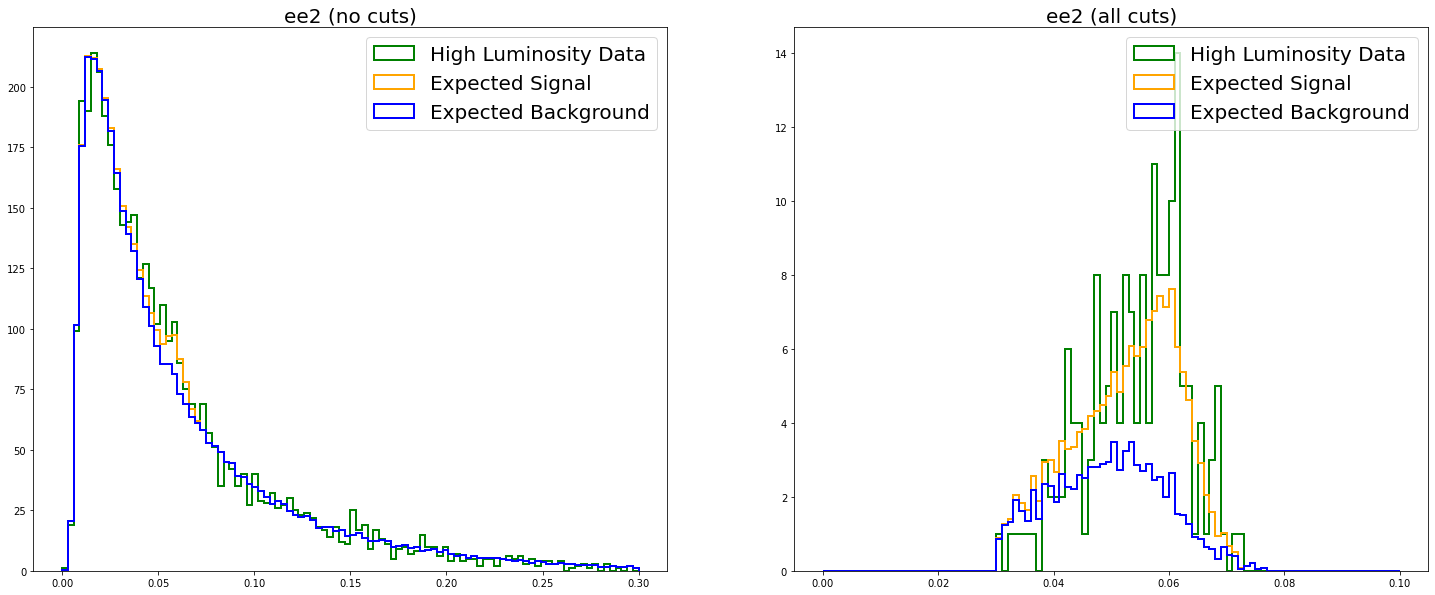

In [72]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

ax[0].hist(dataHigh['ee2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', range = (0,0.3), histtype = 'step', linewidth = 2)

ax[0].hist((backgrounddf['ee2'], signaldf['ee2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, range = (0,0.3), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('ee2 (no cuts)', size = 20)
#ax[0].set_xlim(0,1)


ax[1].hist(dataHigh_cut['ee2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', range = (0,0.1),histtype = 'step', linewidth = 2)

ax[1].hist((backgrounddf_all['ee2'], signaldf_all['ee2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, range = (0,0.1),histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('ee2 (all cuts)', size = 20)
;

''

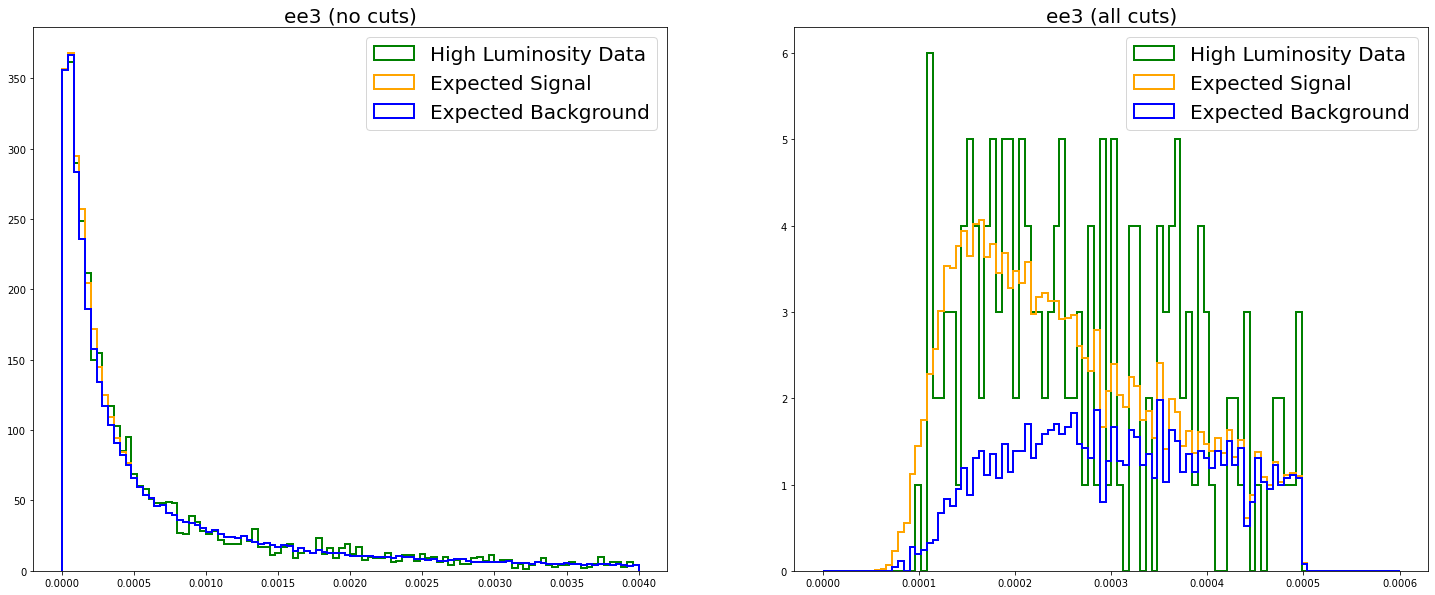

In [73]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['ee3'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.004))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['ee3'], signaldf['ee3']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.004))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('ee3 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataHigh_cut['ee3'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.0006))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['ee3'][big_ole_mask], signaldf['ee3'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.0006))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('ee3 (all cuts)', size = 20)
;

''

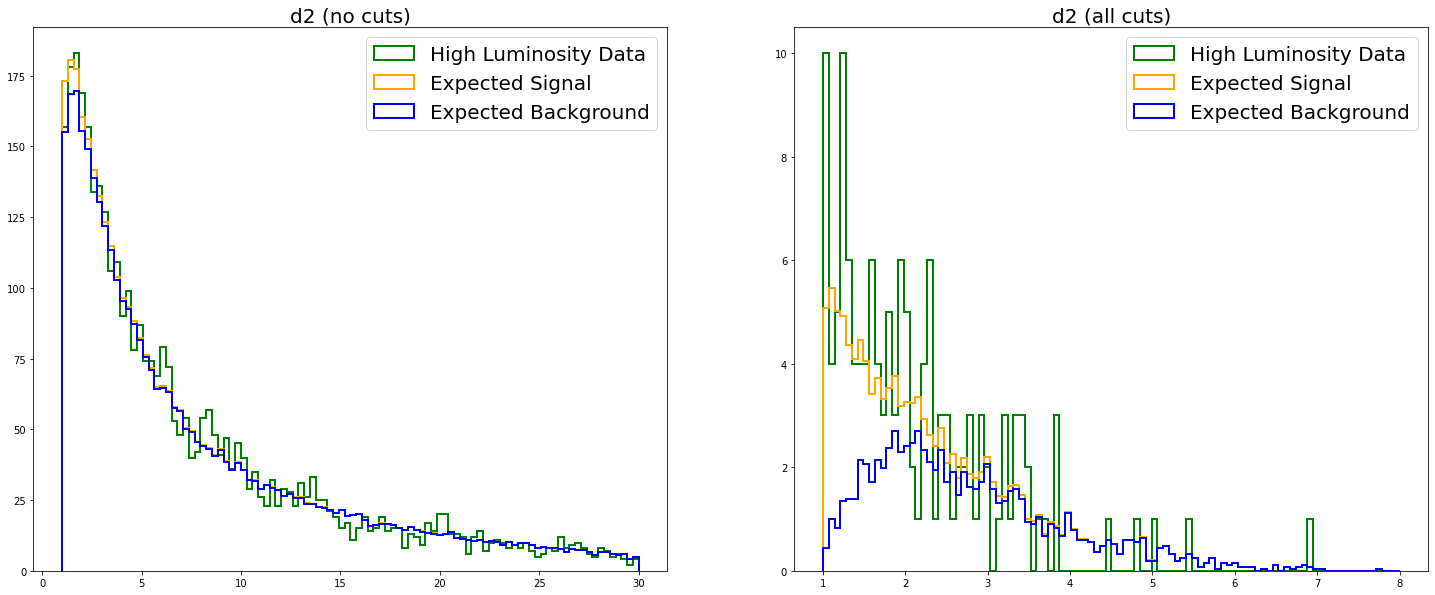

In [74]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['d2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (1,30))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['d2'], signaldf['d2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2, range = (1,30))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('d2 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataHigh_cut['d2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (1,8))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['d2'][big_ole_mask], signaldf['d2'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2, range = (1,8))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('d2 (all cuts)', size = 20)
;

''

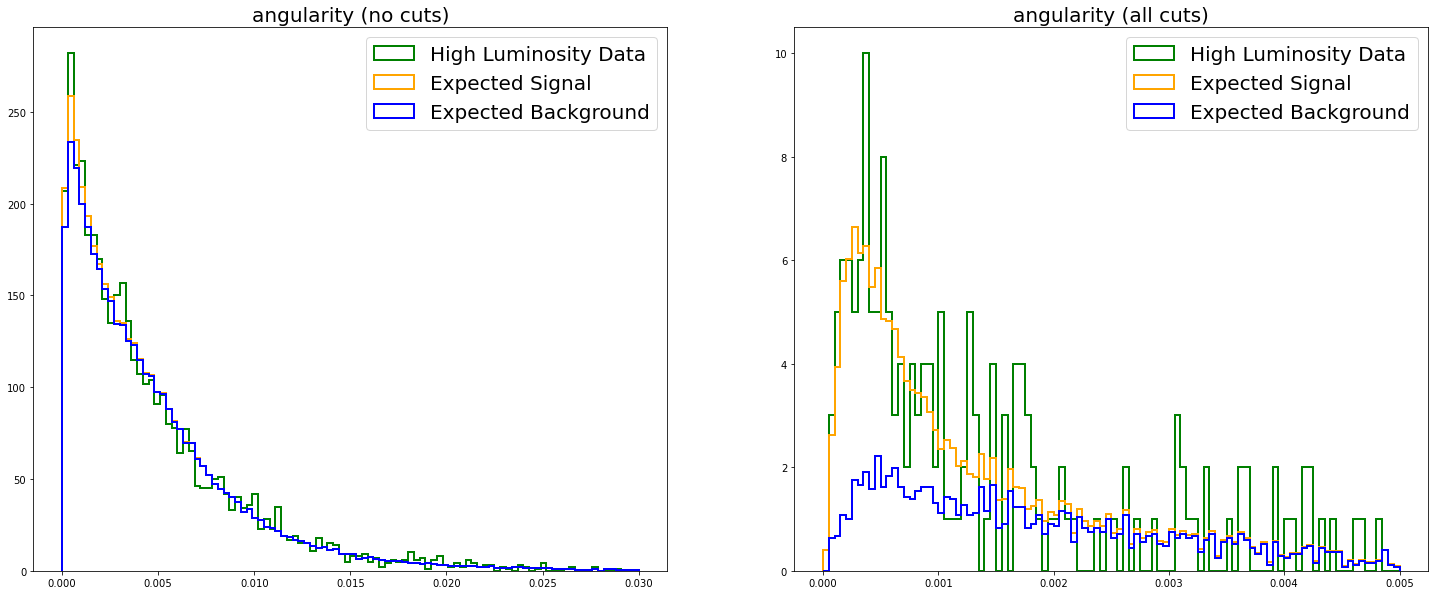

In [75]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['angularity'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.03))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['angularity'], signaldf['angularity']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.03))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('angularity (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataHigh_cut['angularity'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.005))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['angularity'][big_ole_mask], signaldf['angularity'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.005))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('angularity (all cuts)', size = 20)
;

''

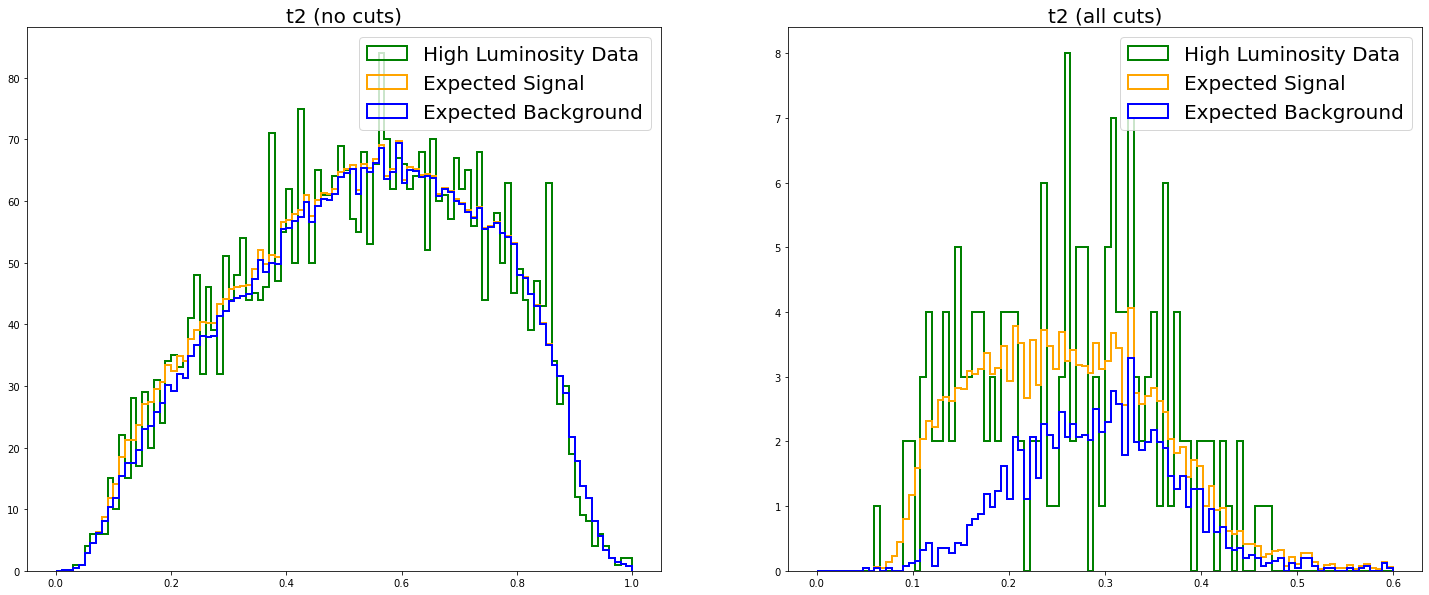

In [76]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['t2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,1))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['t2'], signaldf['t2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,1))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t2 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataHigh_cut['t2'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.6))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['t2'][big_ole_mask], signaldf['t2'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.6))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t2 (all cuts)', size = 20)
;

''

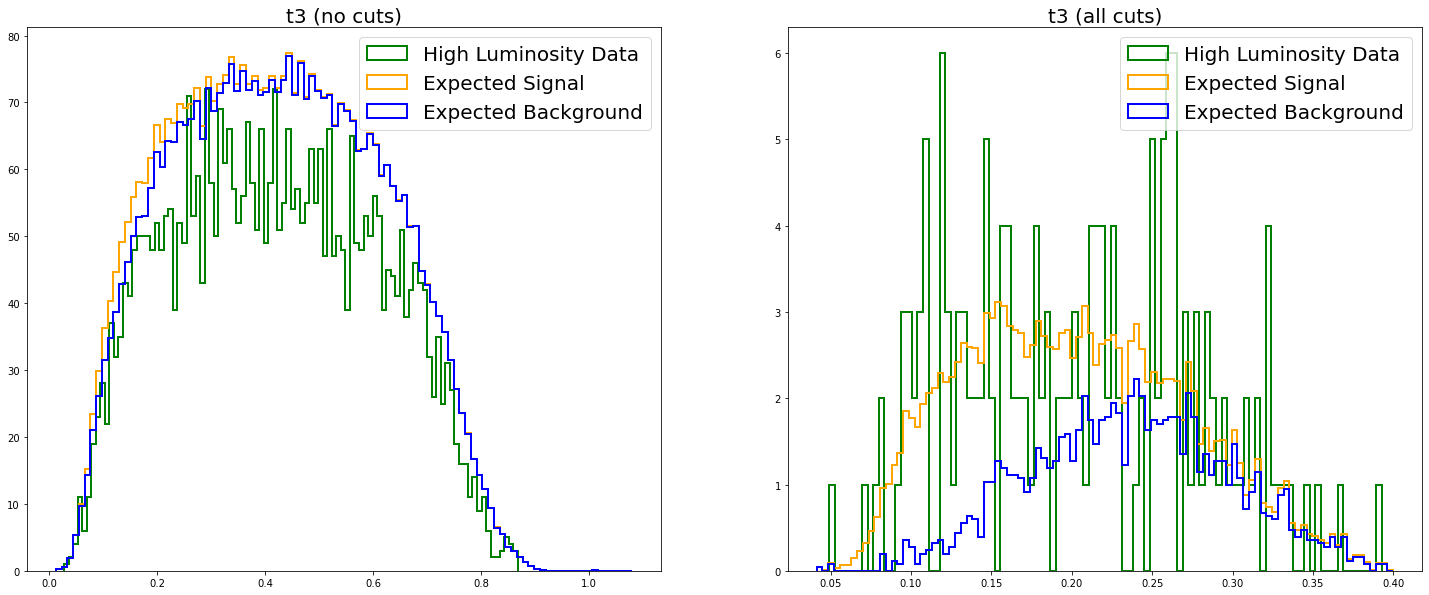

In [77]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['t3'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['t3'], signaldf['t3']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t3 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataHigh_cut['t3'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['t3'][big_ole_mask], signaldf['t3'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t3 (all cuts)', size = 20)
;

''

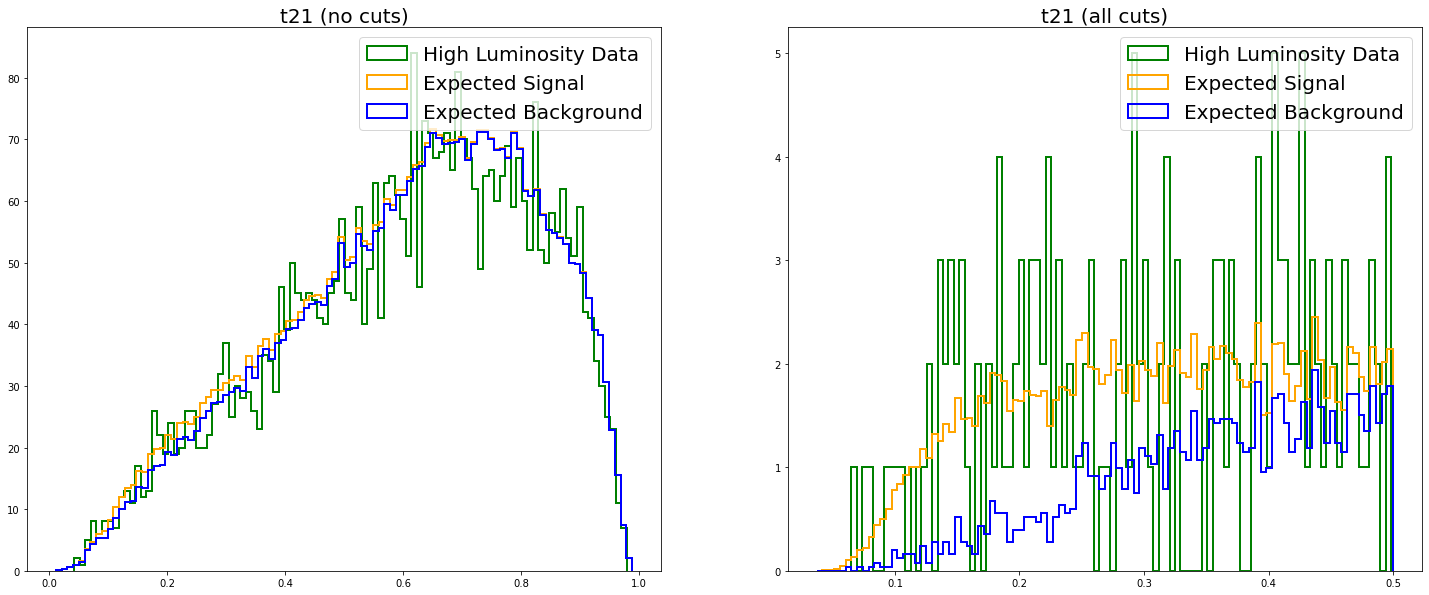

In [78]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['t21'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_sim_bkg_nc, n_sim_nc), temp1, temp2 = ax[0].hist((backgrounddf['t21'], signaldf['t21']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t21 (no cuts)', size = 20)


n_obsh_c, temp1, temp2 = ax[1].hist(dataHigh_cut['t21'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_c, n_higgsh_c), temp1, temp2 = ax[1].hist((backgrounddf['t21'][big_ole_mask], signaldf['t21'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t21 (all cuts)', size = 20)
;

''

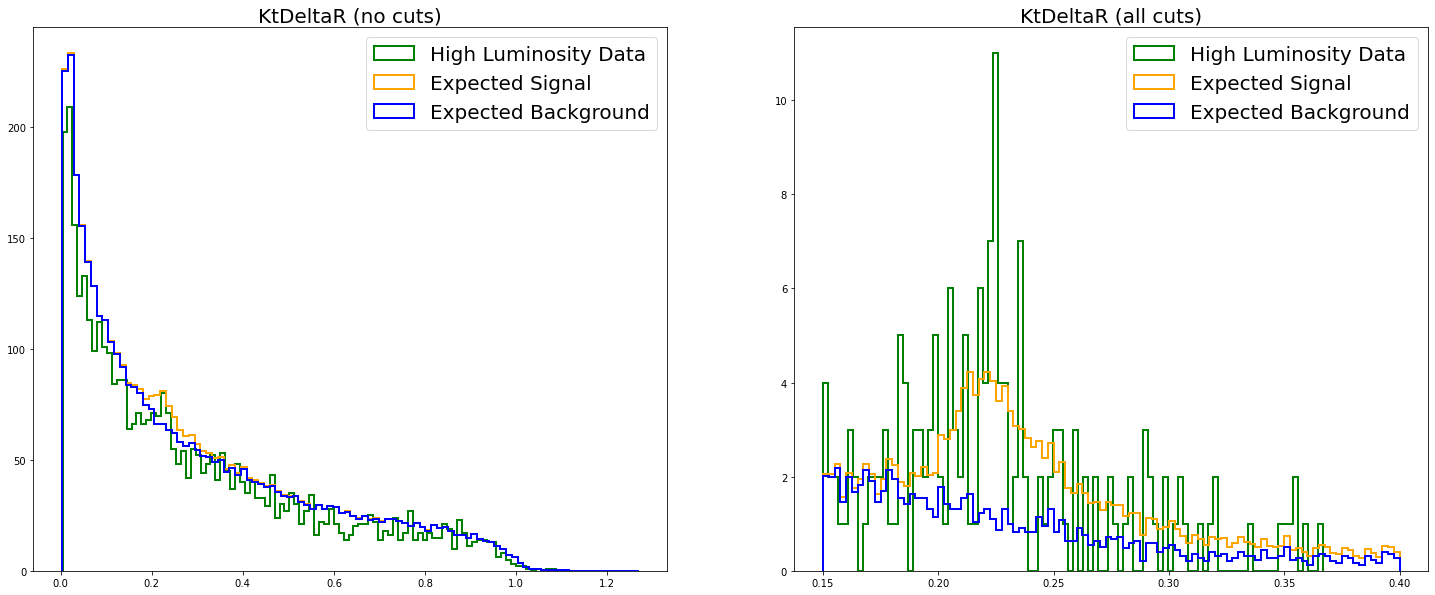

In [79]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataHigh['KtDeltaR'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_sim_bkg_nc, n_sim_nc), temp1, temp2 = ax[0].hist((backgrounddf['KtDeltaR'], signaldf['KtDeltaR']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_nc, weights_higgsh_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('KtDeltaR (no cuts)', size = 20)


n_obsh_c, temp1, temp2 = ax[1].hist(dataHigh_cut['KtDeltaR'], bins = 100, alpha = 1, color = 'green' , label = 'High Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_c, n_higgsh_c), temp1, temp2 = ax[1].hist((backgrounddf['KtDeltaR'][big_ole_mask], signaldf['KtDeltaR'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdh_c, weights_higgsh_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('KtDeltaR (all cuts)', size = 20)
;

##### Calculating Observed Significance

In [80]:
qcd_frac_expect = N_qcd/len(backgrounddf)

In [81]:
qcd_frac_expect

0.02

In [82]:
expected_qcd_dataHigh = len(dataHigh) * qcd_frac_expect

In [83]:
expected_qcd_dataHigh

81.32000000000001

In [84]:
observed_qcd_dataHigh = np.sum(n_obsh_c)

In [85]:
observed_qcd_dataHigh

170.0

In [86]:
excess_high = observed_qcd_dataHigh - expected_qcd_dataHigh

In [87]:
excess_high

88.67999999999999

In [88]:
observed_sig_high = excess_high/np.sqrt(observed_qcd_dataHigh)

In [89]:
print(f'The expected significance is: {sig_all:.2f}. The observed significance is: {observed_sig_high:.2f}.')

The expected significance is: 5.81. The observed significance is: 6.80.


2. Low luminosity data
    * Do as before with the high luminosity data and comment on the difference.

In [90]:
weights_qcdl_nc = np.repeat((1/len(backgrounddf['mass']))*((442*2000)/2050), len(backgrounddf['mass']))
weights_higgsl_nc = np.repeat((1/len(signaldf['mass']))*((442*50)/2050), len(signaldf['mass']))

weights_qcdl_c = np.repeat((1/len(backgrounddf['mass']))*((442*2000)/2050), len(backgrounddf['mass'][big_ole_mask]))
weights_higgsl_c = np.repeat((1/len(signaldf['mass']))*((442*50)/2050), len(signaldf['mass'][big_ole_mask_s]))

In [91]:
eta_mask_prior_dataLow = (dataLow['eta'] > -1.5) & (dataLow['eta'] < 1.5) 
ee2_mask_prior_dataLow = (dataLow['ee2'] > 0.03) & (dataLow['ee2'] < 0.08)
ee3_mask_prior_dataLow = dataLow['ee3'] < 0.0005
d2_mask_prior_dataLow = dataLow['d2'] < 10
angularity_mask_prior_dataLow = dataLow['angularity'] < 0.005
t2_mask_prior_dataLow = dataLow['t2'] < 0.75
t3_mask_prior_dataLow = dataLow['t3'] < 0.4
t21_mask_prior_dataLow = dataLow['t21'] < 0.5
ktdeltar_mask_prior_dataLow = (dataLow['KtDeltaR'] > 0.15) & (dataLow['KtDeltaR'] < 0.4)

In [92]:
big_ole_mask_dataLow = ((dataLow['mass'] > 100) & (dataLow['mass'] < 160)) & (ktdeltar_mask_prior_dataLow) & (eta_mask_prior_dataLow) & (ee2_mask_prior_dataLow) & (ee3_mask_prior_dataLow) & (d2_mask_prior_dataLow) & (angularity_mask_prior_dataLow) & (t2_mask_prior_dataLow) & (t3_mask_prior_dataLow) & (t21_mask_prior_dataLow)


In [93]:
dataLow_cut = dataLow[big_ole_mask_dataLow]

''

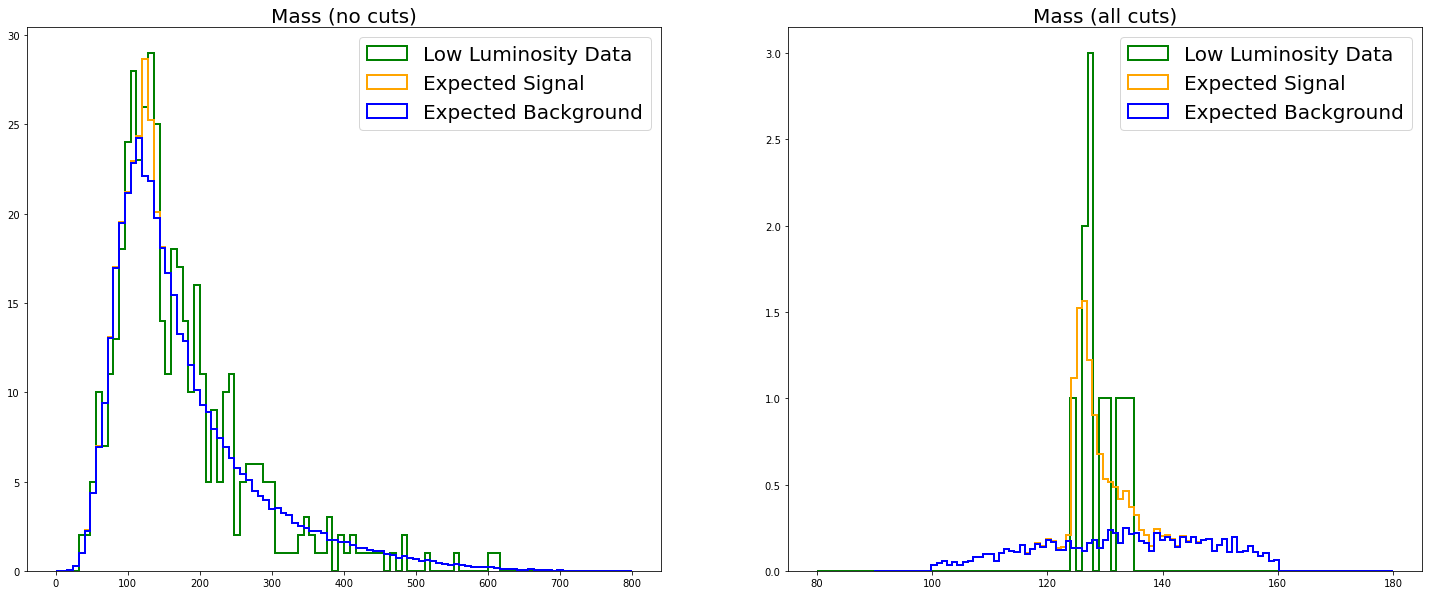

In [94]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_dataHigh_nc, temp1, temp2 = ax[0].hist(dataLow['mass'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', range = (0,800), histtype = 'step', 
                                     linewidth = 2)

n_nocuts, temp1, temp2 = ax[0].hist((backgrounddf['mass'], signaldf['mass']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, range = (0,800), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('Mass (no cuts)', size = 20)


n_dataLow_c, temp1, temp2 = ax[1].hist(dataLow_cut['mass'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', range = (80,180), histtype = 'step', 
                                     linewidth = 2)

n_cuts, temp1, temp2 = ax[1].hist((backgrounddf['mass'][big_ole_mask], signaldf['mass'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, range = (90,180), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('Mass (all cuts)', size = 20)
;

''

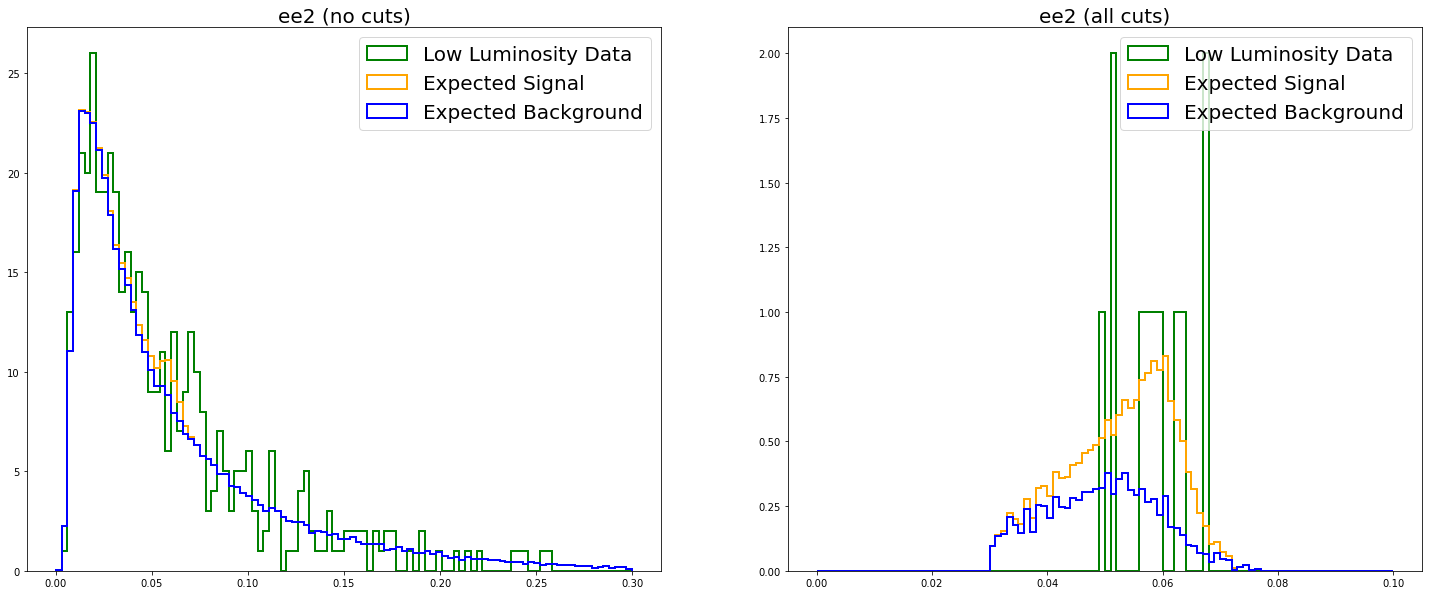

In [95]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

ax[0].hist(dataLow['ee2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', range = (0,0.3), histtype = 'step', linewidth = 2)

ax[0].hist((backgrounddf['ee2'], signaldf['ee2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, range = (0,0.3), histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('ee2 (no cuts)', size = 20)
#ax[0].set_xlim(0,1)


ax[1].hist(dataLow_cut['ee2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', range = (0,0.1),histtype = 'step', linewidth = 2)

ax[1].hist((backgrounddf_all['ee2'], signaldf_all['ee2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, range = (0,0.1),histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('ee2 (all cuts)', size = 20)
;

''

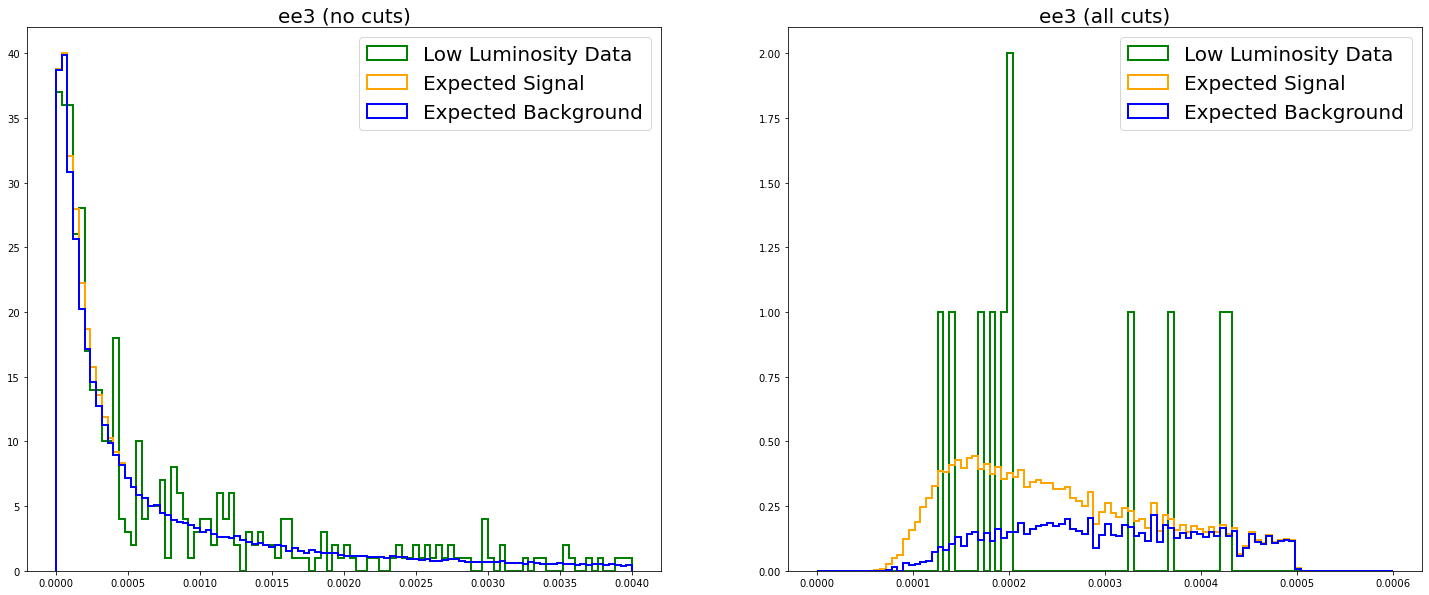

In [96]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataLow['ee3'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.004))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['ee3'], signaldf['ee3']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.004))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('ee3 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataLow_cut['ee3'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.0006))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['ee3'][big_ole_mask], signaldf['ee3'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.0006))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('ee3 (all cuts)', size = 20)
;

''

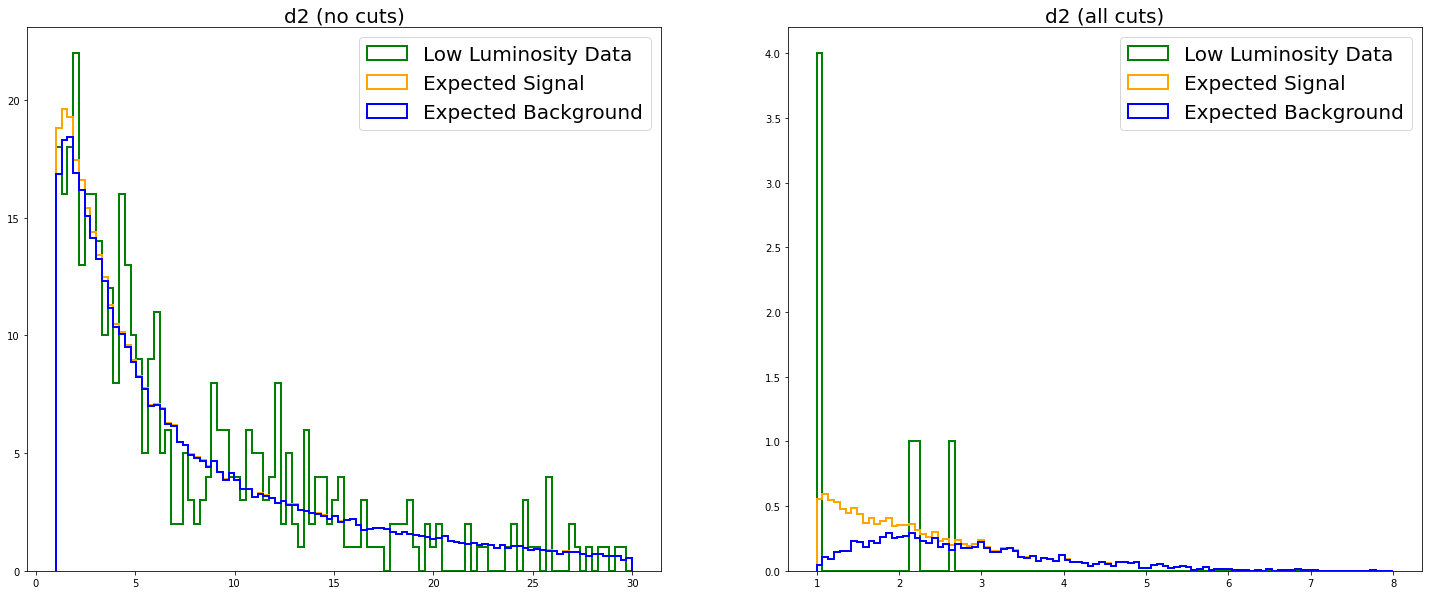

In [97]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataLow['d2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (1,30))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['d2'], signaldf['d2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2, range = (1,30))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('d2 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataLow_cut['d2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (1,8))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['d2'][big_ole_mask], signaldf['d2'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2, range = (1,8))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('d2 (all cuts)', size = 20)
;

''

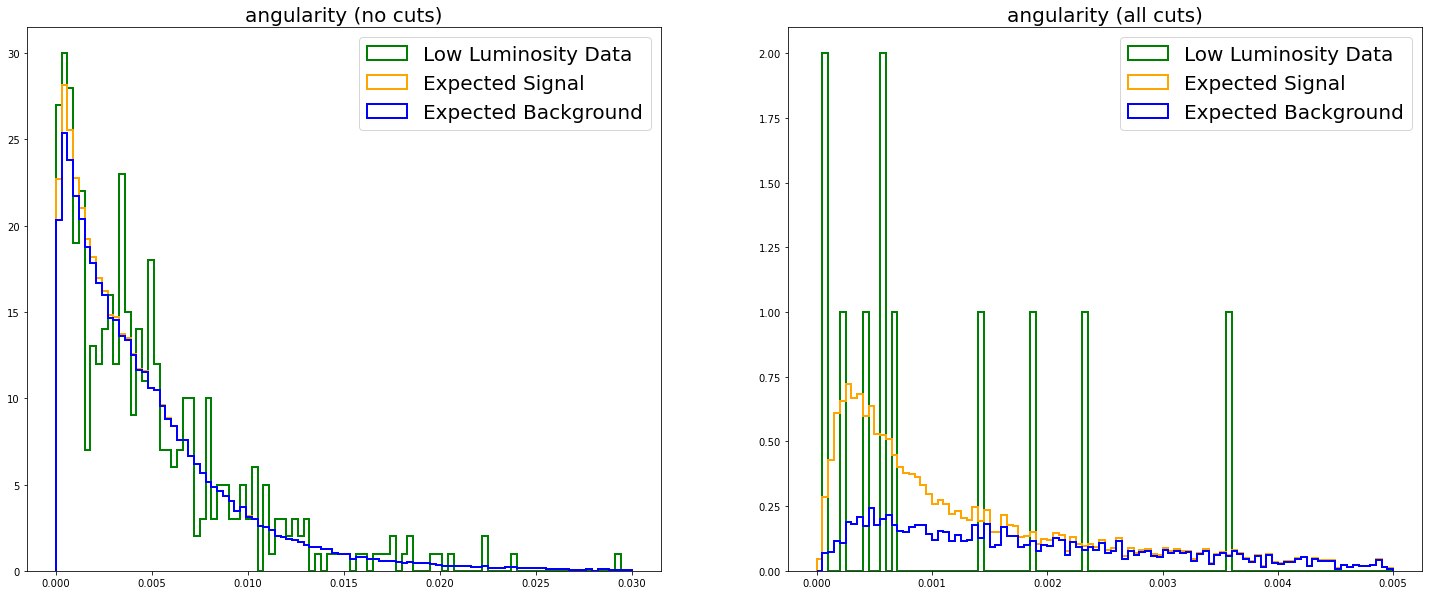

In [98]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataLow['angularity'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.03))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['angularity'], signaldf['angularity']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.03))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('angularity (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataLow_cut['angularity'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.005))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['angularity'][big_ole_mask], signaldf['angularity'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.005))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('angularity (all cuts)', size = 20)
;

''

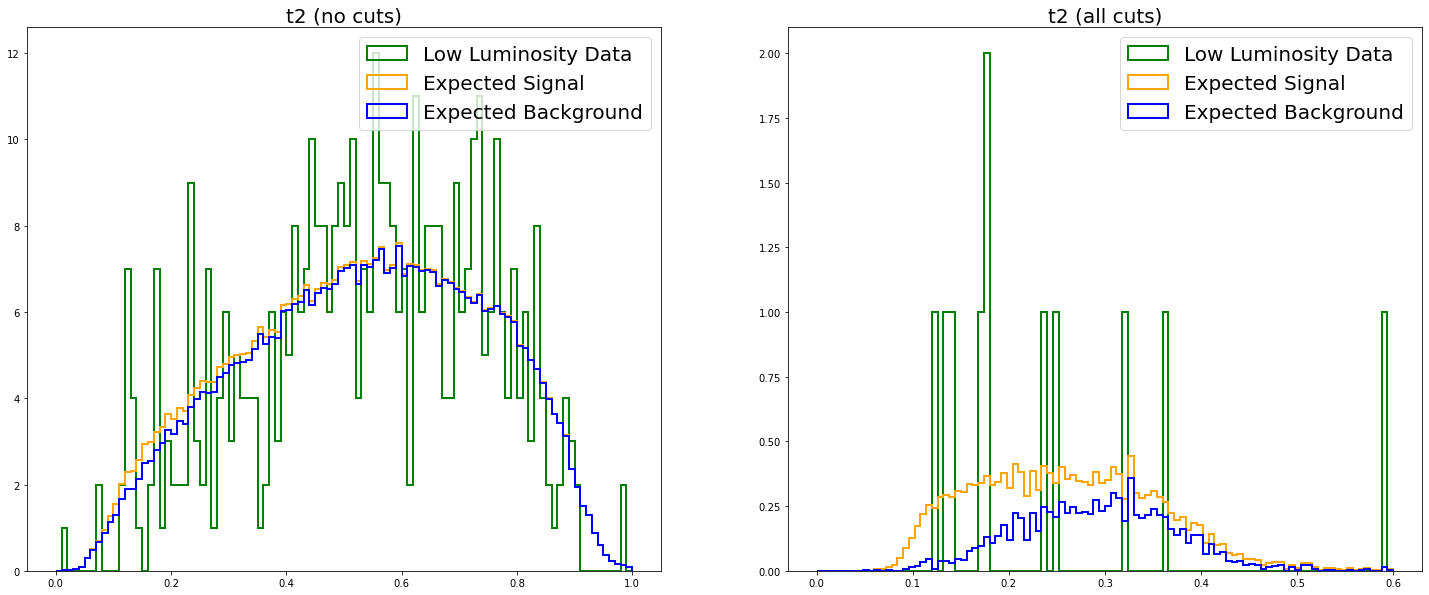

In [99]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataLow['t2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,1))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['t2'], signaldf['t2']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2, range = (0,1))

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t2 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataLow_cut['t2'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2, range = (0,0.6))

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['t2'][big_ole_mask], signaldf['t2'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2, range = (0,0.6))

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t2 (all cuts)', size = 20)
;

''

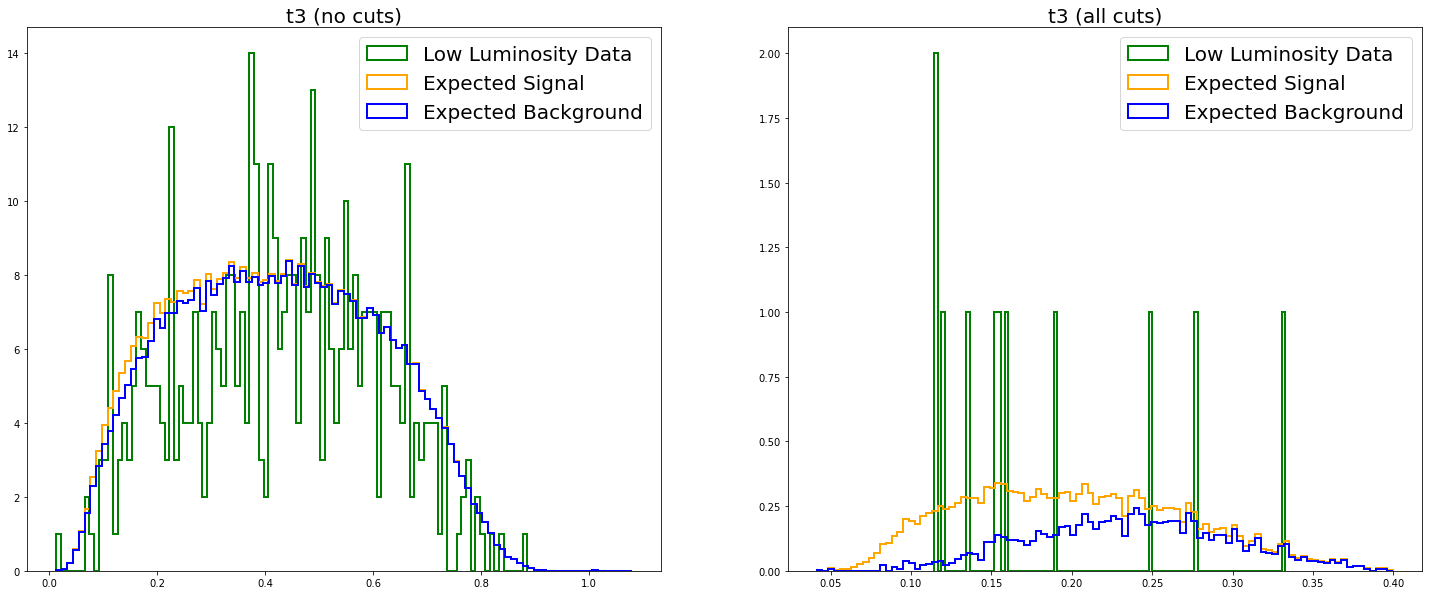

In [100]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsh_nc, temp1, temp2 = ax[0].hist(dataLow['t3'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[0].hist((backgrounddf['t3'], signaldf['t3']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t3 (no cuts)', size = 20)


n_obsh_nc, temp1, temp2 = ax[1].hist(dataLow_cut['t3'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdh_nc, n_higgsh_nc), temp1, temp2 = ax[1].hist((backgrounddf['t3'][big_ole_mask], signaldf['t3'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t3 (all cuts)', size = 20)
;

''

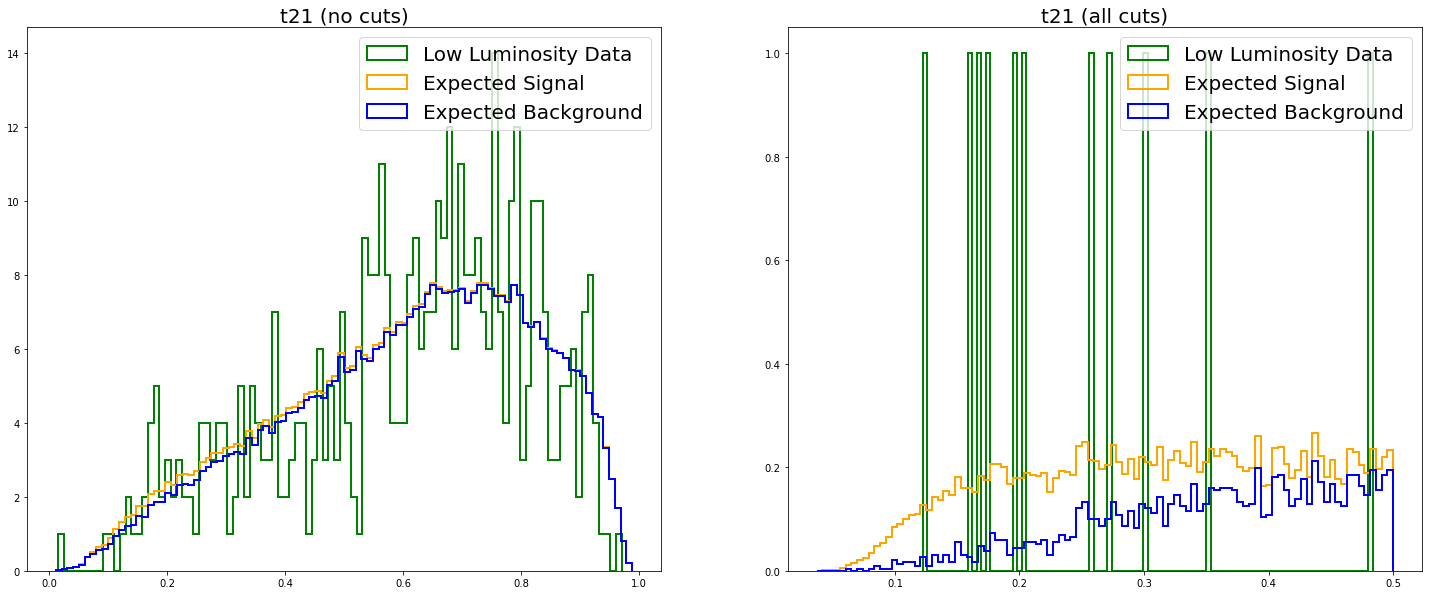

In [101]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsl_nc, temp1, temp2 = ax[0].hist(dataLow['t21'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_sim_bkg_nc, n_sim_nc), temp1, temp2 = ax[0].hist((backgrounddf['t21'], signaldf['t21']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('t21 (no cuts)', size = 20)


n_obsl_c, temp1, temp2 = ax[1].hist(dataLow_cut['t21'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdl_c, n_higgsl_c), temp1, temp2 = ax[1].hist((backgrounddf['t21'][big_ole_mask], signaldf['t21'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('t21 (all cuts)', size = 20)
;

''

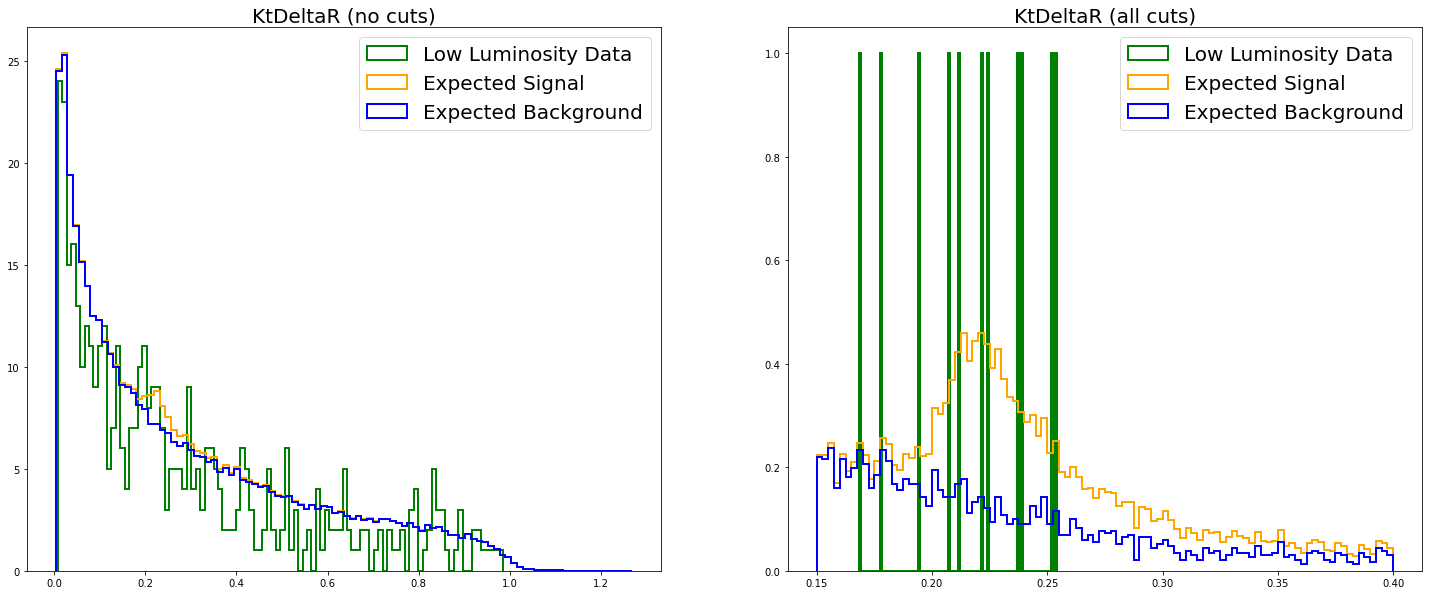

In [102]:
fig, ax = plt.subplots(1,2, figsize = (25,10))

n_obsl_nc, temp1, temp2 = ax[0].hist(dataLow['KtDeltaR'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_sim_bkg_nc, n_sim_nc), temp1, temp2 = ax[0].hist((backgrounddf['KtDeltaR'], signaldf['KtDeltaR']), bins = 100,  color = ('blue', 'orange'), alpha = 1, 
                                     label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_nc, weights_higgsl_nc), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[0].legend(prop = {'size': 20})
ax[0].set_title('KtDeltaR (no cuts)', size = 20)


n_obsl_c, temp1, temp2 = ax[1].hist(dataLow_cut['KtDeltaR'], bins = 100, alpha = 1, color = 'green' , label = 'Low Luminosity Data', histtype = 'step', 
                                     linewidth = 2)

(n_qcdl_c, n_higgsl_c), temp1, temp2 = ax[1].hist((backgrounddf['KtDeltaR'][big_ole_mask], signaldf['KtDeltaR'][big_ole_mask_s]), bins = 100,  color = ('blue', 'orange'), 
                                                    alpha = 1, label = ('Expected Background', 'Expected Signal'), 
                                     weights = (weights_qcdl_c, weights_higgsl_c), stacked = True, histtype = 'step', linewidth = 2)

#plt.yscale('log')
ax[1].legend(prop = {'size': 20})
ax[1].set_title('KtDeltaR (all cuts)', size = 20)
;

##### Calculating Observed Significance

In [103]:
expected_qcd_dataLow = len(dataLow) * qcd_frac_expect

In [104]:
expected_qcd_dataLow

8.84

In [105]:
observed_qcd_dataLow = np.sum(n_obsl_c)

In [106]:
observed_qcd_dataLow

11.0

In [107]:
excess_low = observed_qcd_dataLow - expected_qcd_dataLow

In [108]:
excess_low

2.16

In [109]:
observed_sig_low = excess_low/np.sqrt(observed_qcd_dataLow)

In [110]:
print(f'The expected significance is: {sig_all:.2f}. The observed significance is: {observed_sig_low:.2f}.')

The expected significance is: 5.81. The observed significance is: 0.65.


The observed significance is drastically lower in the low luminosity data than it is in the high luminosity data! We are seeing only an excess of approximately 2 events in the low luminosity data, so based on the expected number of QCD's (about 9), our significance is far below 5 sigma.

3. 95% Confidence Level of signal yields
    * In the low luminosity data, the observed significance is less than 5 𝜎 . We will calculate the 95% confidence level upper limit of signal yield.
    * Evaluate the expected 95% confidence level upper limit
    * Evaluate the observed 95% confidence level upper limit
    * Compare expectation to observation. Comment on your finding.

A 95% confidence interval corresponds to a 2 sigma measurement. So let's just use the approximation 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) to solve for 2 sigma.

For the expected yield, we know that we have an expected yield of 8.84 QCDs for the low luminosity sample. Therefore, the number of Higgs required for 95% confidence is:

In [111]:
n_higgs_95 = 2*np.sqrt(expected_qcd_dataLow)

In [112]:
n_higgs_95

5.946427498927402

Therefore, we would need to have a total of 6 Higgs particles in addition to 9 QCD particles to have a 95% confidence. As a result, our upper limit of events is 15.

For the observed 95% confidence, assume that all observed events are QCD's (11)

In [113]:
n_higgs_95_obs = 2*np.sqrt(observed_qcd_dataLow)

In [114]:
n_higgs_95_obs

6.6332495807108

Therefore, the number of Higgs required for a 2 sigma detection in our observed data is 7 higgs. As a result, our observed upper limit is 18 events. The observed 95% confidence interval is higher than the expected confidence interval. This means that in order to claim a 95% confidece, we must detect a larger number of events than the theoretical expected yeilds predict.